In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
# sns.set(rc={'figure.facecolor':'grey'})


In [2]:
# df = pd.read_csv("./data/377_noNANs.csv")
#df = pd.read_csv("/full_data_with_nans.csv")
df = pd.read_csv("/st_features_without_nans_and_y_with_nans.csv")
df.shape

(5874, 326)

 ### Prepare Data for 1vs3 Encoder Classifier

In **1 vs 3** variant of dataset we have next changes:

- The `3.0` class was redefined as `0.0` class
- All `NaN`-s were substituded with `0.0` class
- **data_one_vs_tree, target_one_vs_tree**: All `2.0` class, which stands for `MCI` were redifined as `1.0`. The intuition behind this decision is that the in beginning of dementia the brain condition can be considered as normal and, furthermore, the slight changes can be connected with age changes
- **data_one_vs_tree_deleted, target_one_vs_tree_deleted**: All patients with `2.0` class, which stands for `MCI` were deleted. The intuition behind this decision is that the.

In [9]:
#df_one_vs_tree = pd.read_csv("/full_data_with_nans.csv")
df_one_vs_tree = pd.read_csv("/st_features_without_nans_and_y_with_nans.csv")
df_one_vs_tree.shape

(5874, 326)

In [10]:
def normalize(arr):
    out = (arr - arr.mean(axis=0)[None,:])/arr.var(axis=0)
    return out

**NOW WE HAVE TO MAKE VARIANTS OF DATASETS**

**_deleted**

In [5]:
### Delete 2.0 rows
print(df_one_vs_tree['Y'].value_counts())
print('-'*15)
df_one_vs_tree_deleted = df_one_vs_tree.drop(df_one_vs_tree[df_one_vs_tree.Y == 2.0].index)
print('Before NaN drops: ',df_one_vs_tree_deleted.shape)
df_one_vs_tree_deleted = df_one_vs_tree_deleted.dropna()
print('After NaN drops: ', df_one_vs_tree_deleted.shape)
print('-'*15)

print(df_one_vs_tree_deleted['Y'].value_counts())

2.0    3108
1.0    1842
3.0     660
Name: Y, dtype: int64
---------------
Before NaN drops:  (2766, 326)
After NaN drops:  (2502, 326)
---------------
1.0    1842
3.0     660
Name: Y, dtype: int64


In [6]:
all_st_cols_one_vs_tree_deleted = [s for s in df_one_vs_tree_deleted.columns if ('ST' in s) and ('STATUS' != s)]
print(len(all_st_cols_one_vs_tree_deleted))
numerical_data_one_vs_tree_deleted = df_one_vs_tree_deleted[all_st_cols_one_vs_tree_deleted]

numerical_data_one_vs_tree_deleted.shape

325


(2502, 325)

In [7]:
data_one_vs_tree_deleted = numerical_data_one_vs_tree_deleted
target_one_vs_tree_deleted = df_one_vs_tree_deleted[['Y']]

data_one_vs_tree_deleted = normalize(data_one_vs_tree_deleted)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [8]:
#target_one_vs_tree_deleted['Y'] = target_one_vs_tree_deleted['Y'].fillna(0.0)

target_one_vs_tree_deleted['Y'] = target_one_vs_tree_deleted['Y'].replace(3.0,0.0)
target_one_vs_tree_deleted['Y'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1.0    1842
0.0     660
Name: Y, dtype: int64

**_replaced**

In [11]:
print('Before NaN drops: ',df_one_vs_tree.shape)
df_one_vs_tree = df_one_vs_tree.dropna()
print('After NaN drops: ', df_one_vs_tree.shape)

all_st_cols_one_vs_tree = [s for s in df_one_vs_tree.columns if ('ST' in s) and ('STATUS' != s)]
print(len(all_st_cols_one_vs_tree))
numerical_data_one_vs_tree = df_one_vs_tree[all_st_cols_one_vs_tree]

numerical_data_one_vs_tree.shape

Before NaN drops:  (5874, 326)
After NaN drops:  (5610, 326)
325


(5610, 325)

In [12]:
data_one_vs_tree = numerical_data_one_vs_tree
target_one_vs_tree = df_one_vs_tree[['Y']]

data_one_vs_tree = normalize(data_one_vs_tree)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [13]:
#target_one_vs_tree['Y'] = target_one_vs_tree['Y'].fillna(0.0)
target_one_vs_tree['Y'] = target_one_vs_tree['Y'].replace(3.0,0.0)
target_one_vs_tree['Y'] = target_one_vs_tree['Y'].replace(2.0,1.0)
target_one_vs_tree['Y'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1.0    4950
0.0     660
Name: Y, dtype: int64

**END WORK WITH DATA ONE VS THREE**

## Autoencoders on tabular data

We will build a latent representation for tabular data with simple Autoencoder (AE). We are going to work with the cancer dataset from scikit-learn package. You are to follow the instructions.  

1.  Implement AE modules for tabular data. Train AE to get latent representation of the cancer dataset from `sklearn.datasets()`. Use `MSE` loss and get < $0.3$ on validation, with AE "bottleneck" = $2$; 

2. Plot the latent representation of whole dataset in 2D, use colors to show object of different classes.


In [14]:
# imports
import numpy as np

import torch
import torch.nn as nn
import torch.utils.data as torch_data

import sklearn.datasets as sk_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [19]:
#clf_data = pd.concat([data,target],axis=1)
#clf_data = pd.concat([data_one_vs_tree_deleted,target_one_vs_tree_deleted],axis=1)
clf_data = pd.concat([data_one_vs_tree, target_one_vs_tree],axis=1) # Replaced version of data

#one_hot = OneHotEncoder()


clf_data = clf_data.dropna(axis=0)
clf_target = clf_data[['Y']]
clf_target = np.array(clf_target)
#one_hot.fit(clf_target)
clf_data = clf_data.drop('Y',axis=1).values
#clf_target = one_hot.transform(clf_target).todense()

In [20]:
clf_data.shape

(5610, 325)

In [21]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clf_data, clf_target, stratify=clf_target, test_size=0.15, random_state=42)


In [22]:
class ADNI_data(torch_data.Dataset):
    def __init__(self, X, y):
        super(ADNI_data, self).__init__()
        self.X = torch.tensor(X, dtype=torch.float32)                                                           
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [100]:
x_shape = X_train.shape[1] # 325
x_shape_2 = int(X_train.shape[1]/2)
#x_shape_2 = 300


# Here I've added "lambda x_shape_3:" in the beginning because in the 
# cell bellow you wrote "net = MyFirstAE(encoder(2), decoder(2))".
# So, I had to make encoder and decoder functions or remove this (2)
# from the cell below. I've chosen first


encoder = lambda x_shape_3: nn.Sequential(
                        # >>> your solution here <<<
                        nn.Linear(x_shape, x_shape_2),
                        nn.BatchNorm1d(x_shape_2),
                        nn.ReLU(), #True
                        nn.Dropout(p=0.4),
                        nn.Linear(x_shape_2, x_shape_3),
                        )  

decoder = lambda x_shape_3: nn.Sequential(
                        # >>> your solution here <<<
                        nn.Linear(x_shape_3, x_shape_2),
                        nn.BatchNorm1d(x_shape_2),
                        nn.ReLU(),
                        nn.Linear(x_shape_2, x_shape),                      
                        )

In [81]:
X_train.shape[1]

325

In [101]:
class MyFirstAE(nn.Module):
  def __init__(self, encoder, decoder):
        super(MyFirstAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
  def forward(self, inpu):
        """
        Take a mini-batch as an input, encode it to the latent space and decode back to the original space
        x_out = decoder(encoder(x))
        :param x: torch.tensor, (MB, x_dim)
        :return: torch.tensor, (MB, x_dim)
        """
        # BEGIN SOLUTION (do not delete this comment!)
        x1 = self.encoder(inpu)
        x = self.decoder(x1)

        # END Solution (do not delete this comment!)
        
        return x

In [102]:
train_adni = ADNI_data(X_train, y_train)
test_adni = ADNI_data(X_test, y_test)

In [103]:
device ='cpu'
#torch.cuda.current_device()
#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

final_dim = 5
lr = 0.003
b_S = 100

hyperparams = [final_dim, lr, b_S]
net = MyFirstAE(encoder(final_dim), decoder(final_dim))  

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, verbose=True)


train_loader = torch_data.DataLoader(train_adni, batch_size=b_S, shuffle=True) 
val_loader = torch_data.DataLoader(test_adni, batch_size=b_S, shuffle=False) 


In [104]:
train_losses = []
val_losses = []
epochss = []
def train(epochs, net, criterion, optimizer, train_loader, val_loader,scheduler=None, verbose=True, save_dir=None):

    freq = max(epochs//20,1)
    
    for epoch in range(1, epochs+1):
        net.train()

        losses_train = []
        for X, y in train_loader:
            # print(X.shape, y.shape)
            ### BEGIN Solution
            # Perform one step of minibatch stochastic gradient descent
            output = net(X)
            y = torch.squeeze(y)
            y = y.long()
            loss = criterion(output,y)
  
            losses_train.append(loss)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        # define NN evaluation, i.e. turn off dropouts, batchnorms, etc.
        net.eval()
        losses_val = []
        for X, y in val_loader:
            
            # Compute the validation loss

            output = net(X)
            y = torch.squeeze(y)
            y = y.long()
            val_loss = criterion(output,y)
            losses_val.append(val_loss)

            ### END Solution

        if scheduler is not None:
            scheduler.step(val_loss)
        
        if verbose and epoch%freq==0:
            mean_val = sum(losses_val)/len(losses_val)
            mean_train = sum(losses_train)/len(losses_train)

            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'\
                  .format(epoch, epochs, mean_train, mean_val))
            train_losses.append(mean_train)
            val_losses.append(mean_val)
            epochss.append(epoch)

In [105]:
epochs=100
print('HYPERPARAMS:', 'final_dim = ',hyperparams[0],
      'lr = ', hyperparams[1],
      'b_S = ', hyperparams[2])
train(epochs, net, criterion, optimizer, train_loader, val_loader, scheduler)

HYPERPARAMS: final_dim =  5 lr =  0.003 b_S =  100
Epoch 5/100 || Loss:  Train 0.1788 | Validation 0.1563
Epoch 10/100 || Loss:  Train 0.1004 | Validation 0.1291
Epoch 15/100 || Loss:  Train 0.0706 | Validation 0.1285
Epoch 20/100 || Loss:  Train 0.0472 | Validation 0.1274
Epoch 25/100 || Loss:  Train 0.0364 | Validation 0.1385
Epoch 30/100 || Loss:  Train 0.0315 | Validation 0.1407
Epoch    33: reducing learning rate of group 0 to 3.0000e-04.
Epoch 35/100 || Loss:  Train 0.0191 | Validation 0.1347
Epoch 40/100 || Loss:  Train 0.0158 | Validation 0.1383
Epoch    44: reducing learning rate of group 0 to 3.0000e-05.
Epoch 45/100 || Loss:  Train 0.0088 | Validation 0.1401
Epoch 50/100 || Loss:  Train 0.0105 | Validation 0.1419
Epoch    55: reducing learning rate of group 0 to 3.0000e-06.
Epoch 55/100 || Loss:  Train 0.0120 | Validation 0.1416
Epoch 60/100 || Loss:  Train 0.0149 | Validation 0.1419
Epoch 65/100 || Loss:  Train 0.0104 | Validation 0.1416
Epoch    66: reducing learning rate 

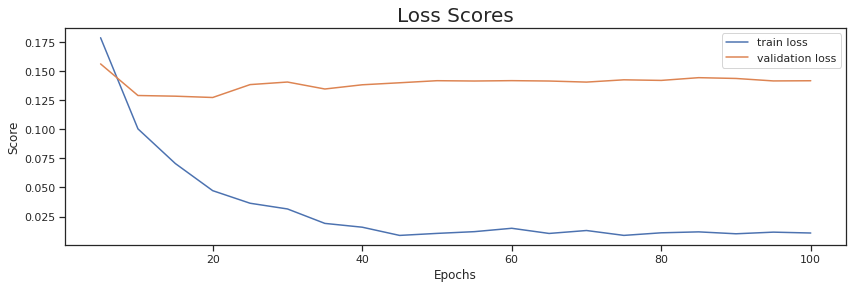

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(epochss, train_losses, label='train loss')
plt.plot(epochss, val_losses, label='validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Loss Scores', fontsize = 20)
plt.show()

### Build Latent Representation of Encoder's bottleneck





  0%|          | 0/35 [00:00<?, ?it/s]

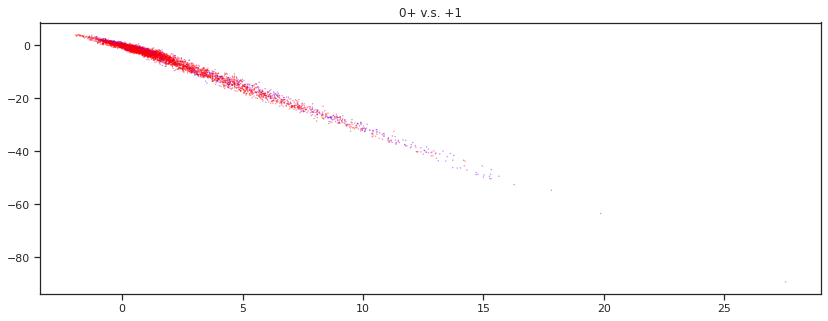

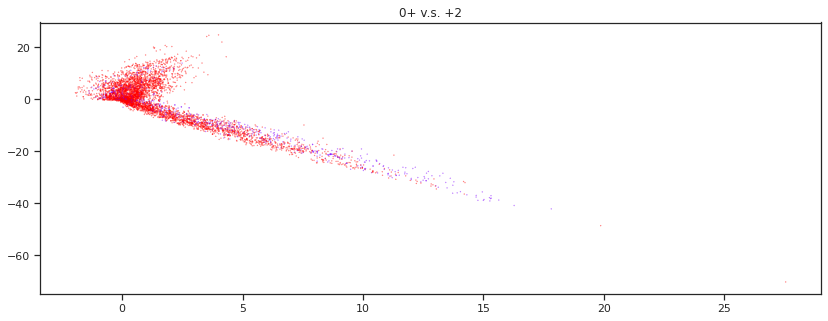

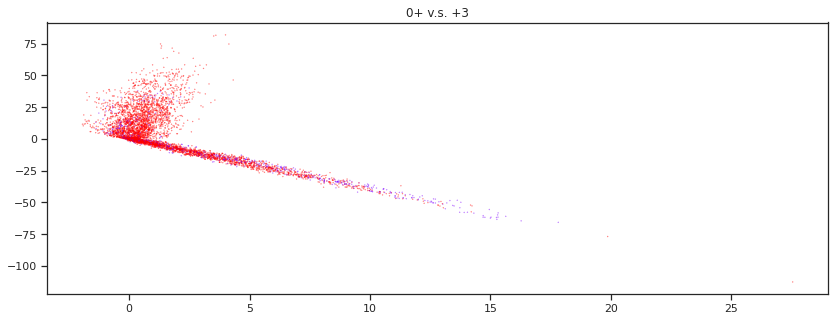

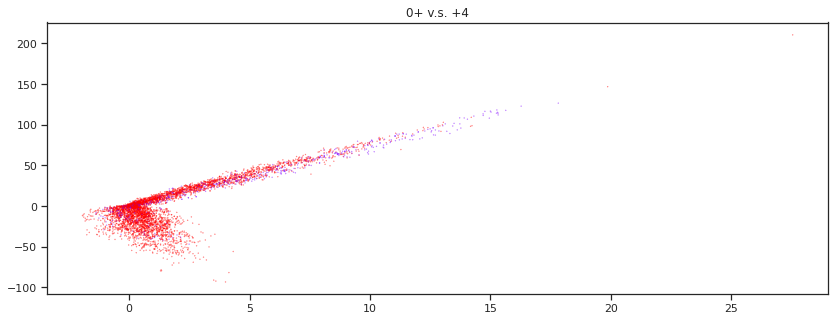

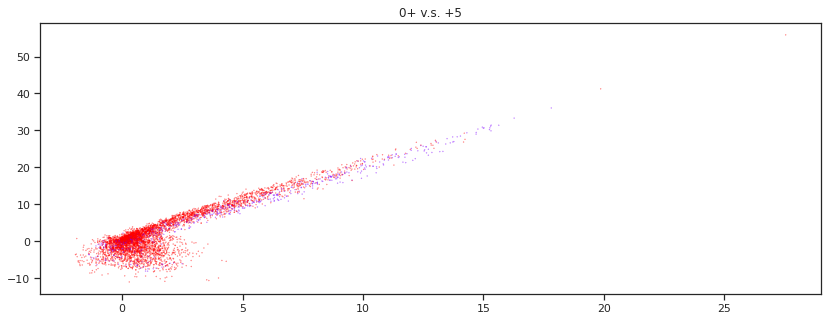

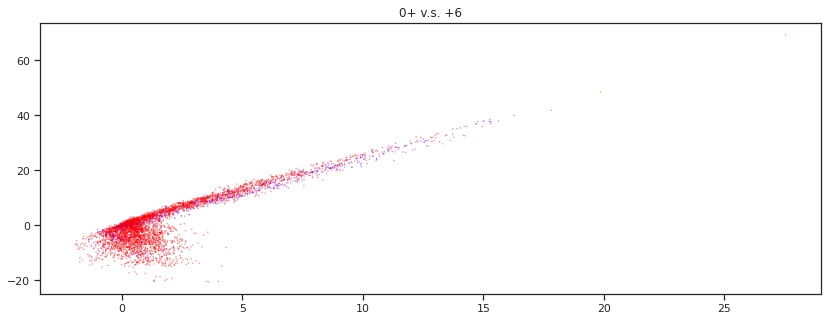

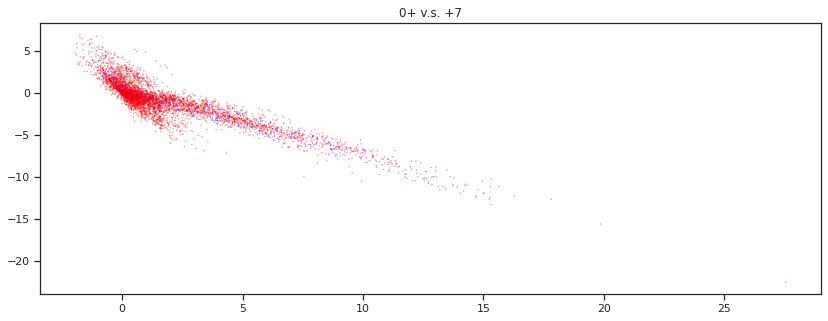

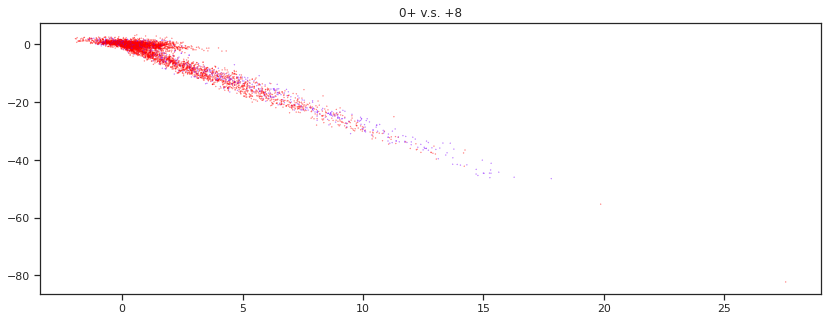

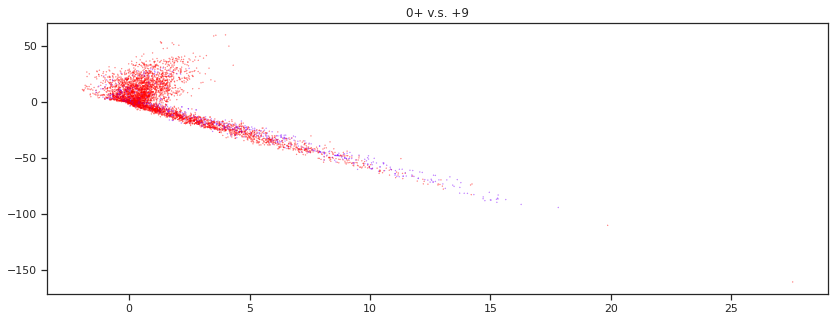

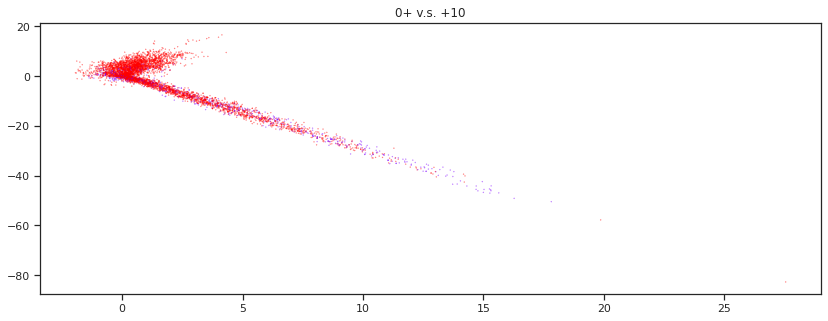

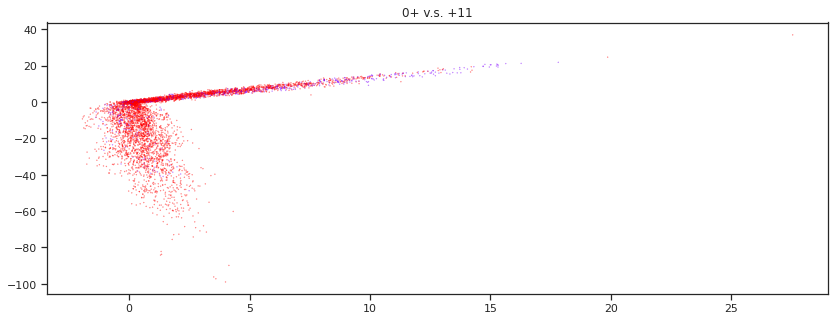

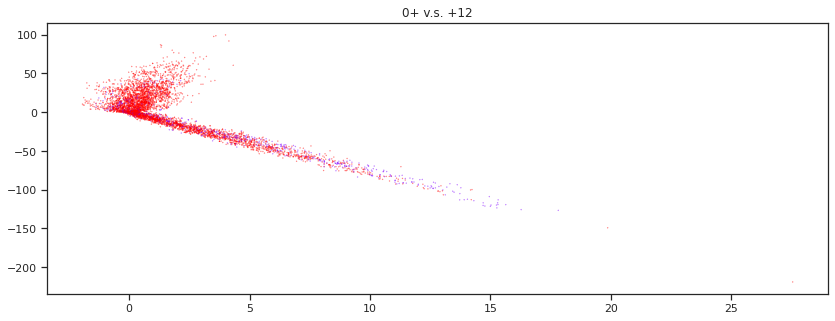

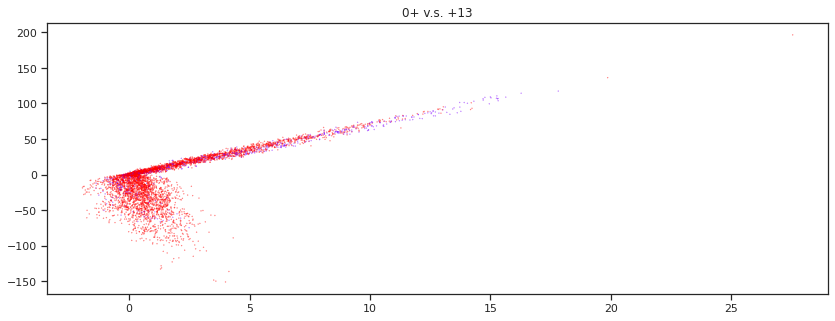

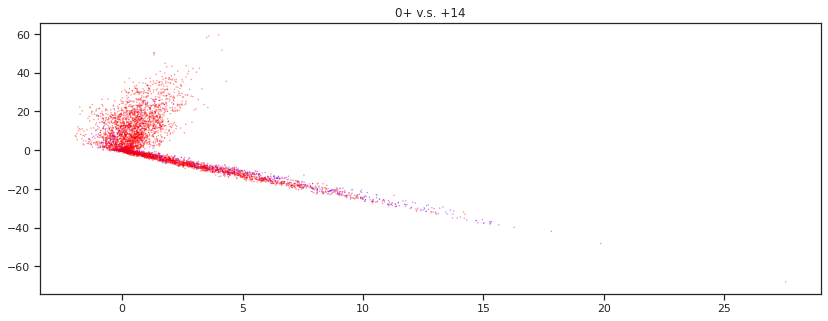

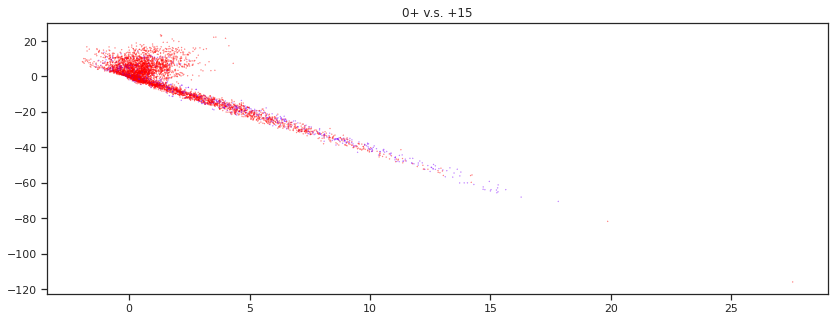

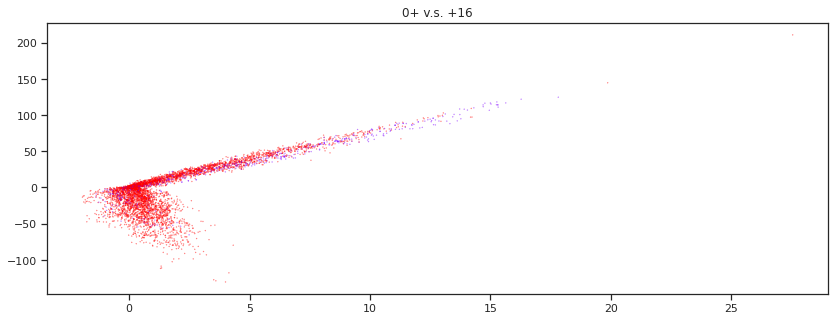

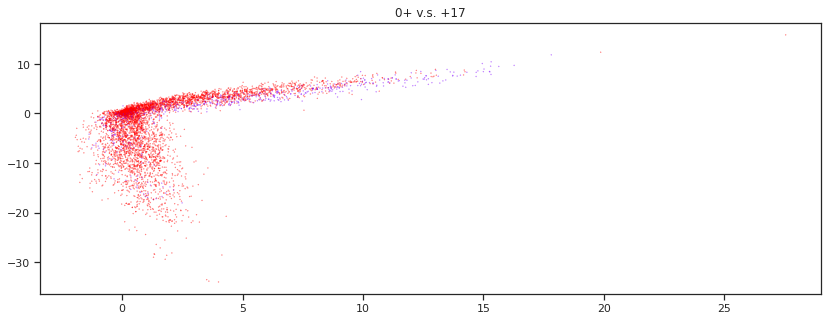

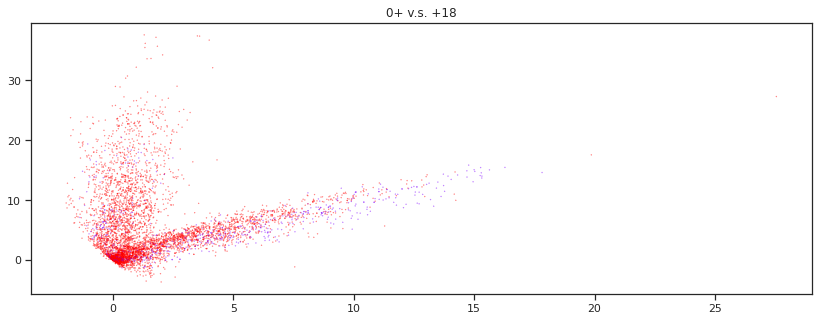

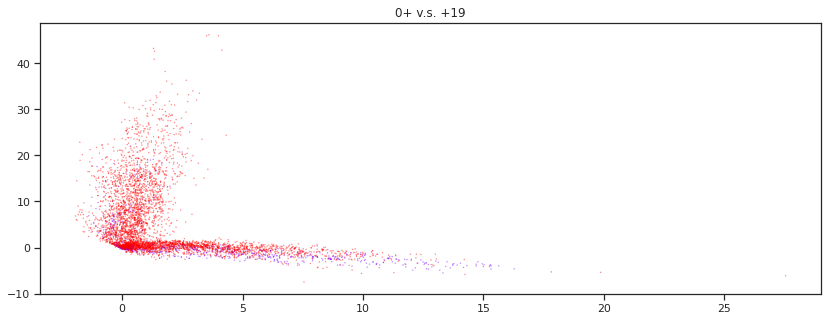

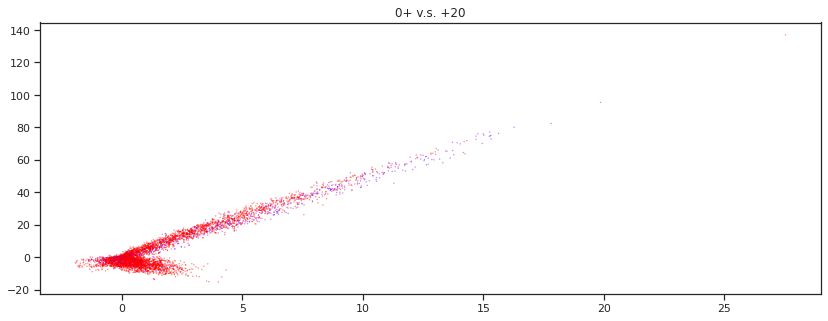

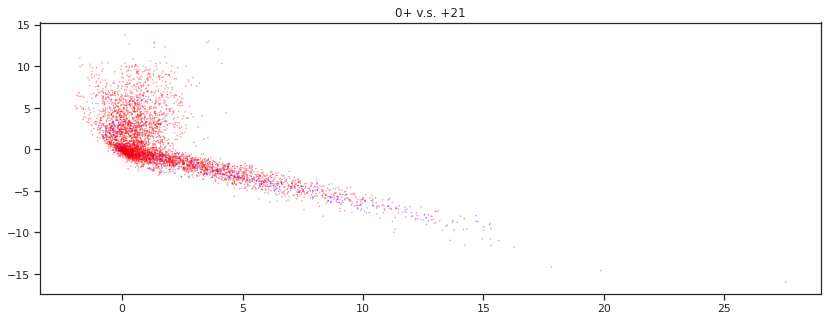

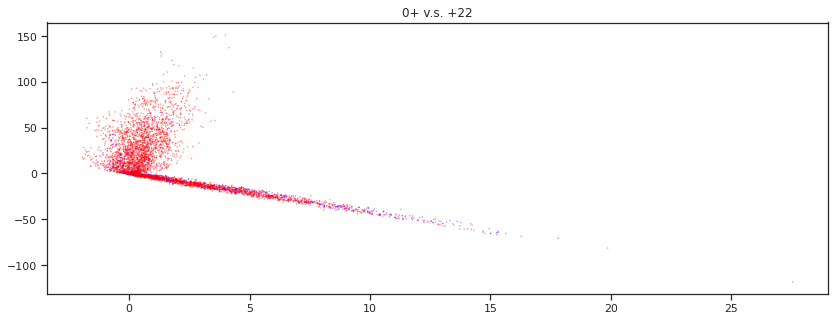

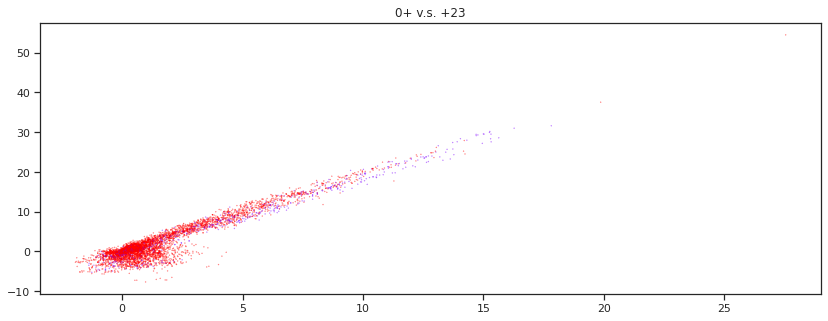

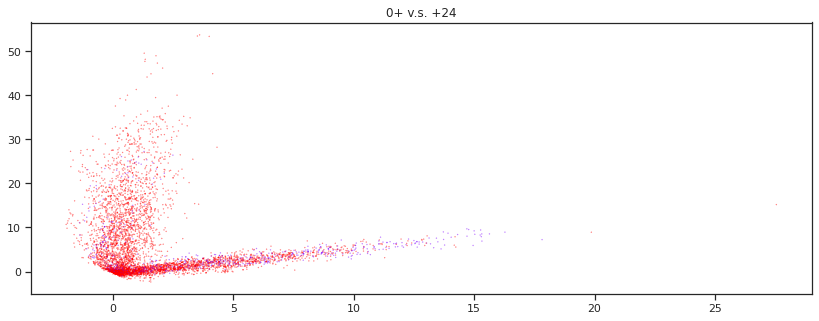

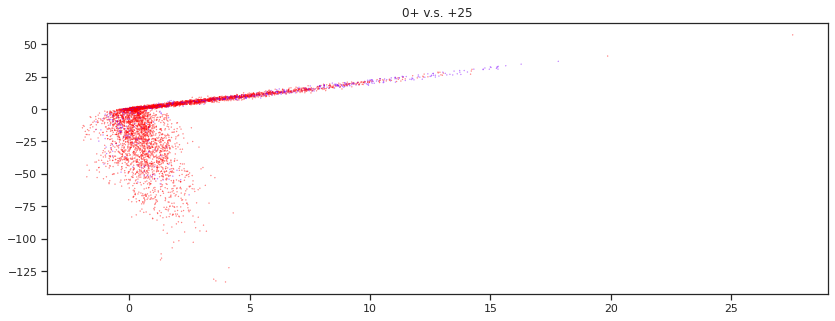

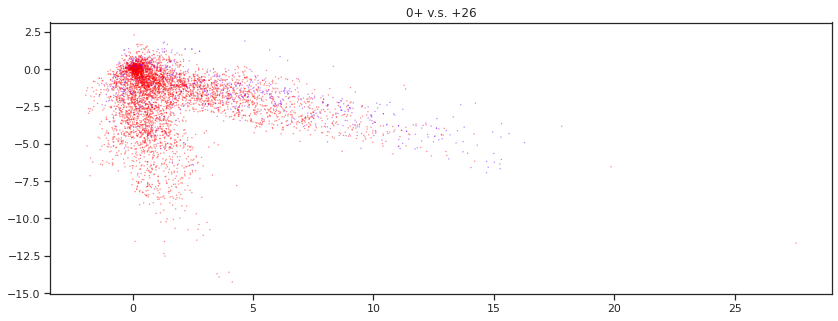

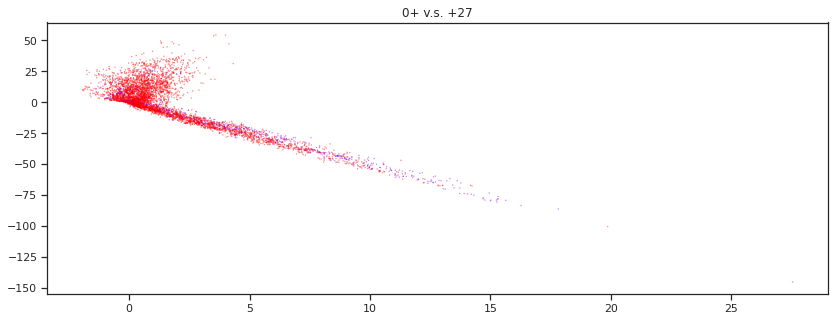

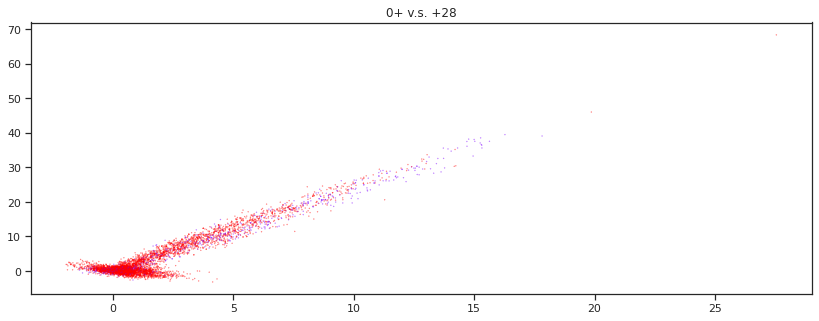

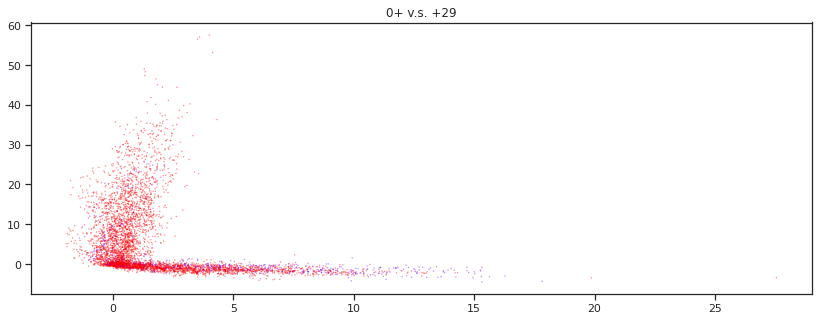

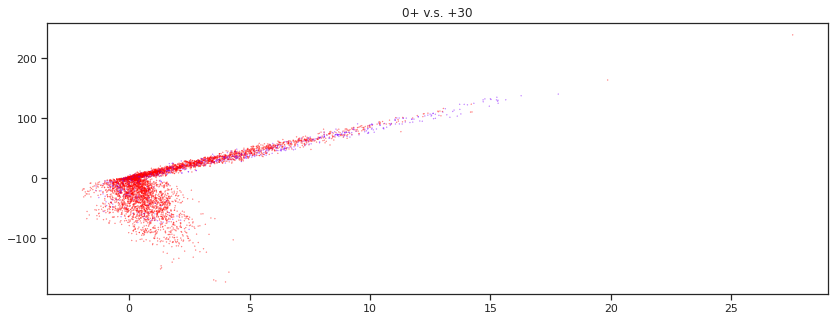

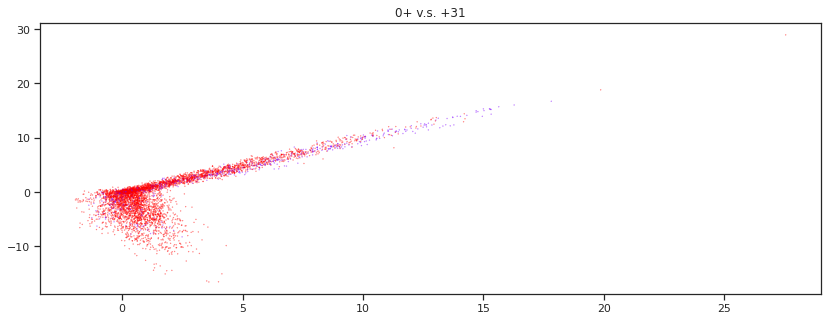

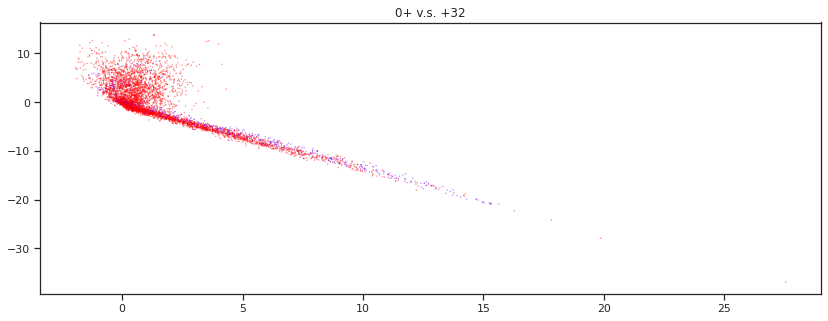

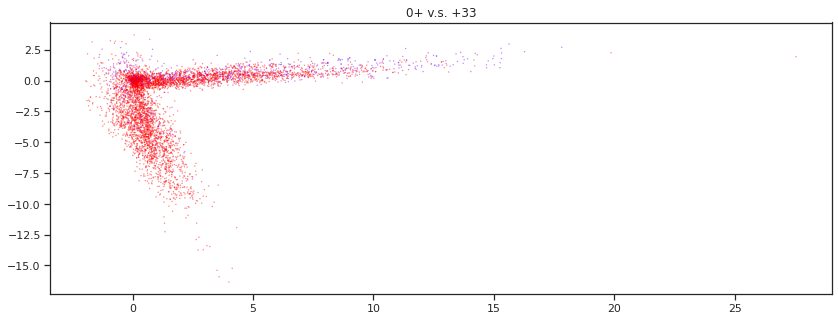

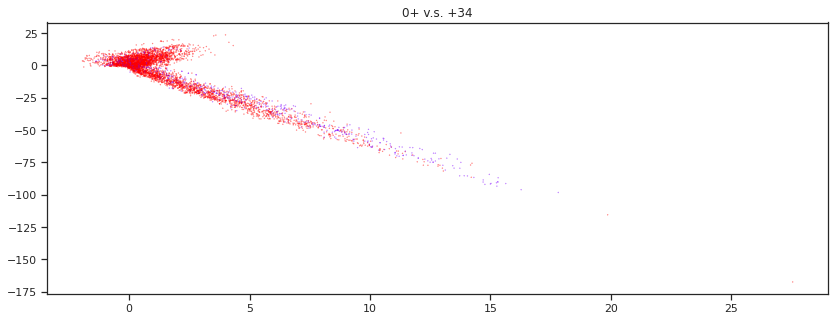





  3%|▎         | 1/35 [00:17<10:06, 17.83s/it]

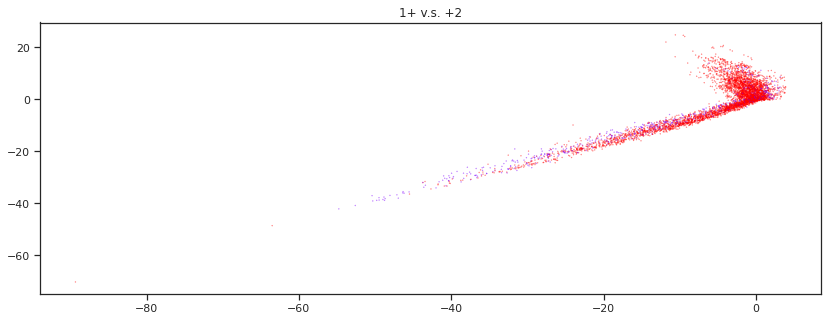

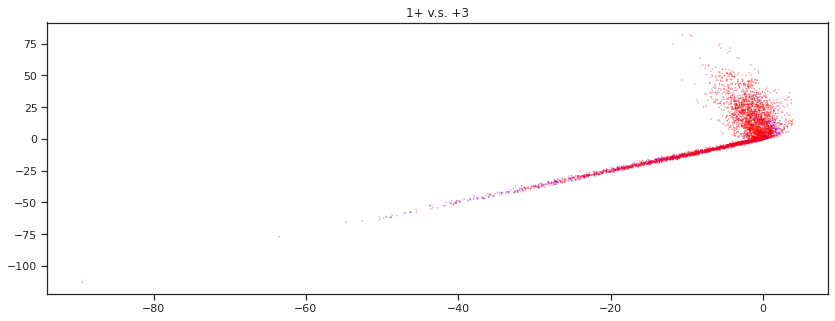

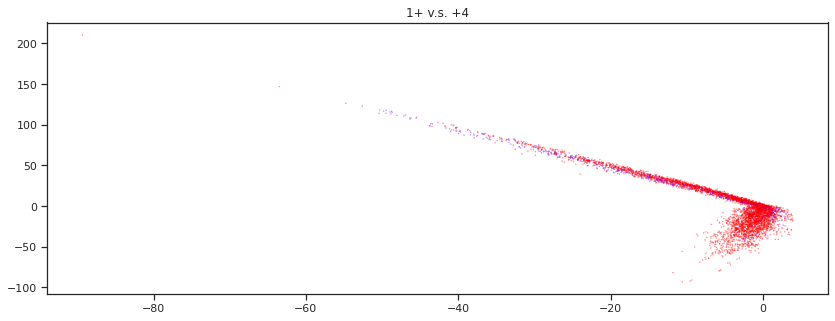

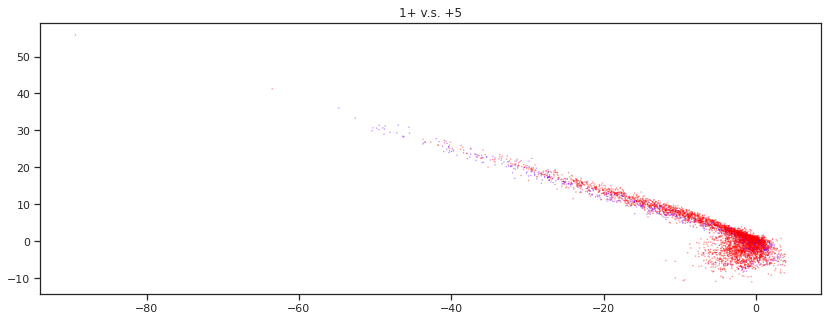

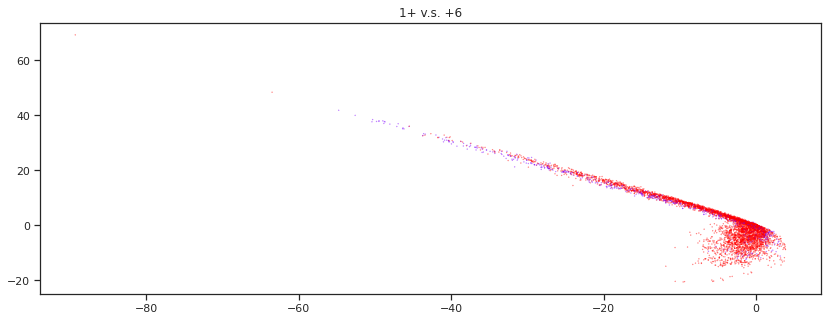

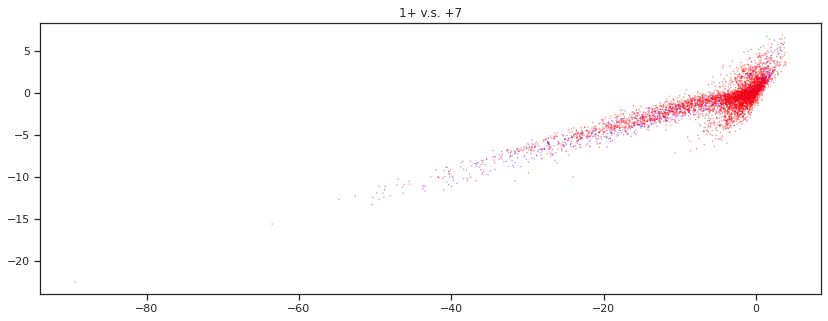

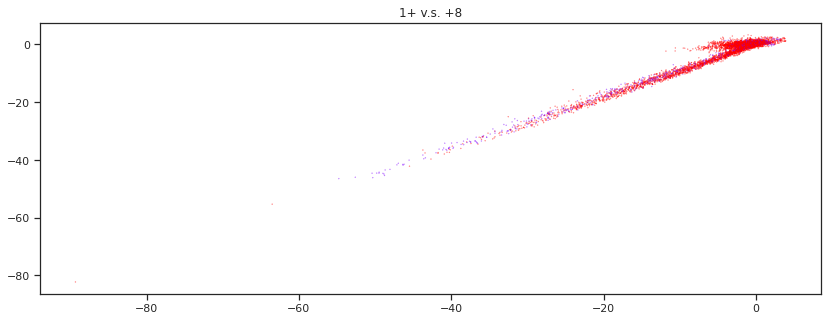

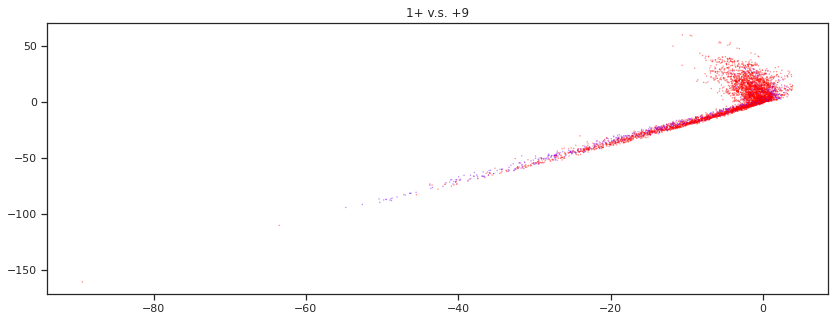

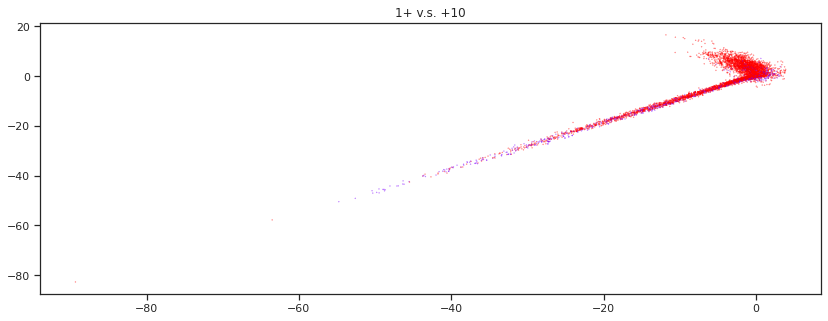

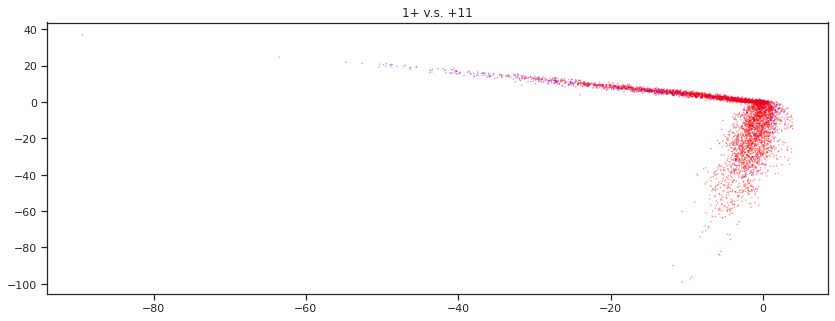

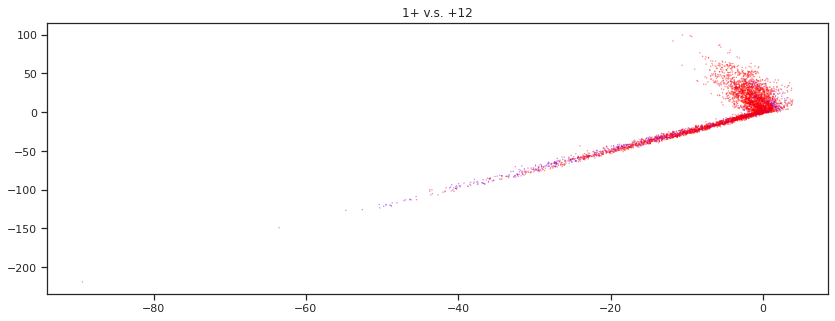

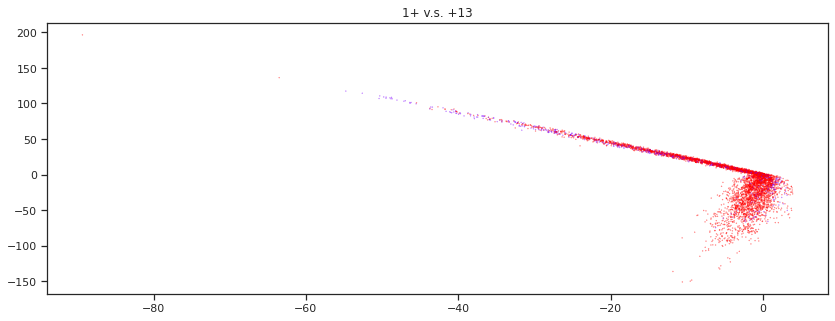

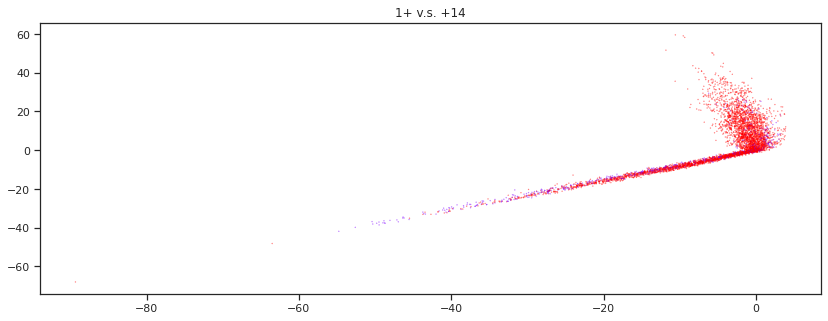

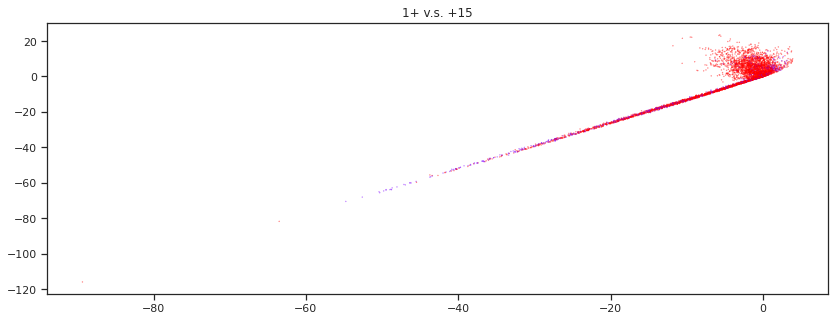

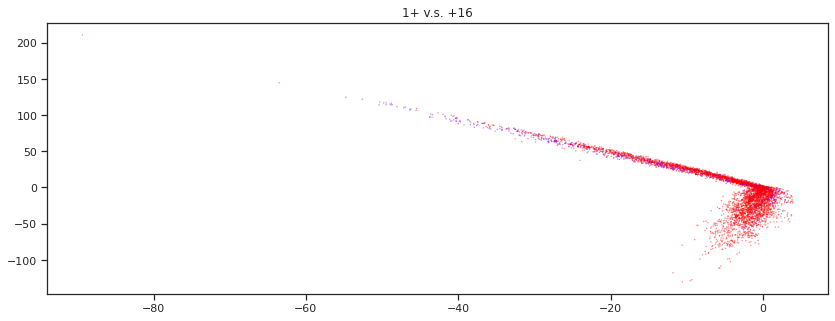

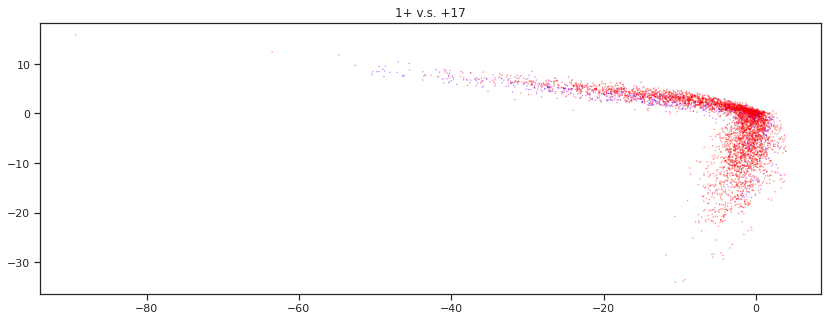

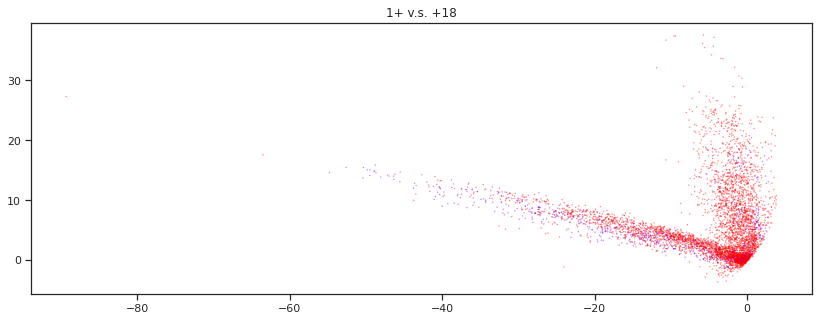

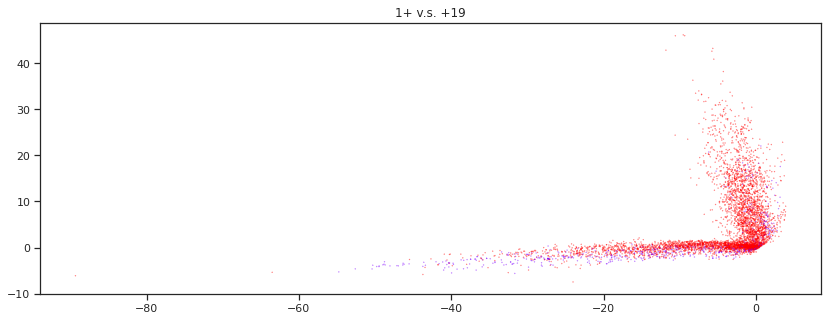

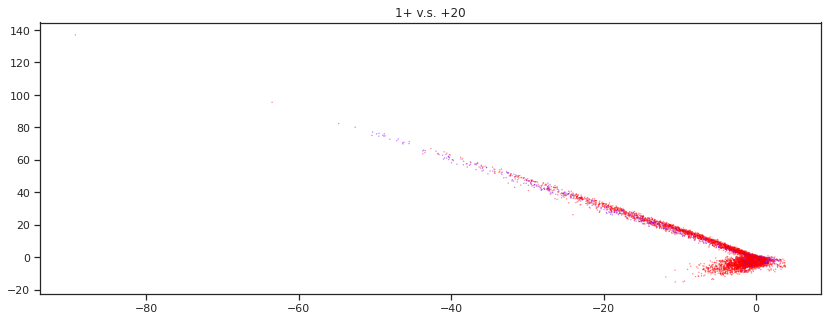

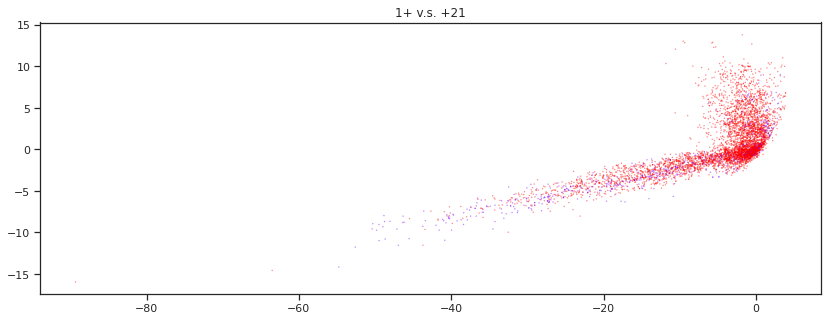

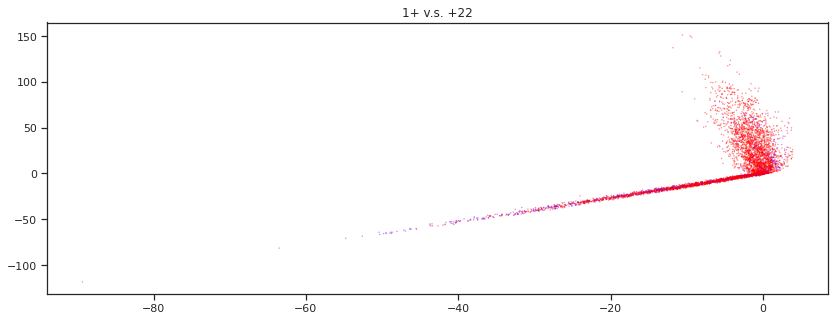

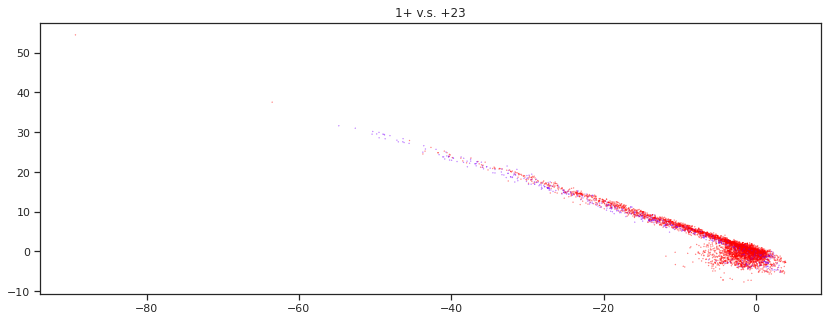

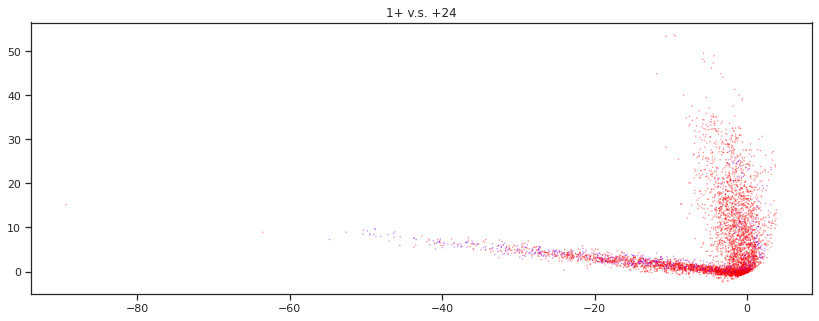

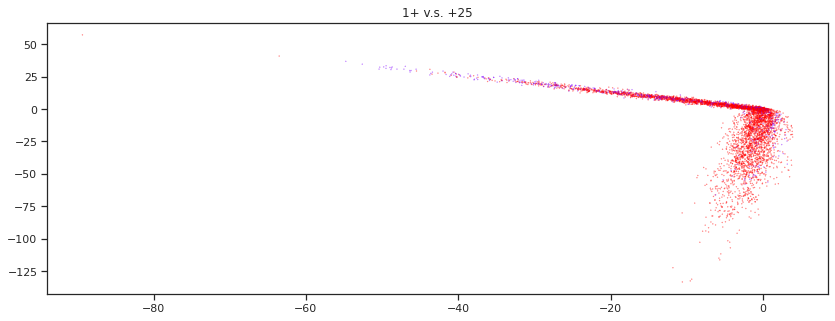

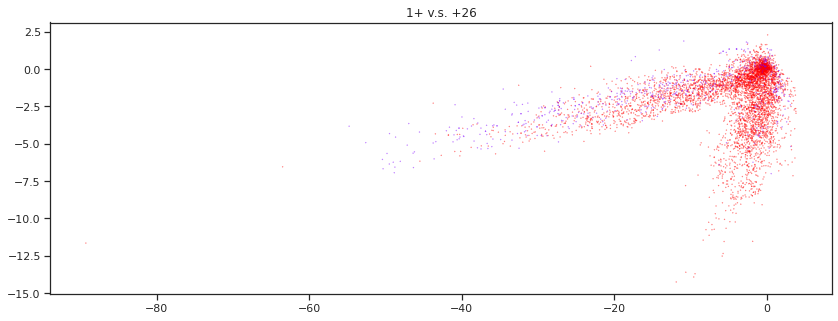

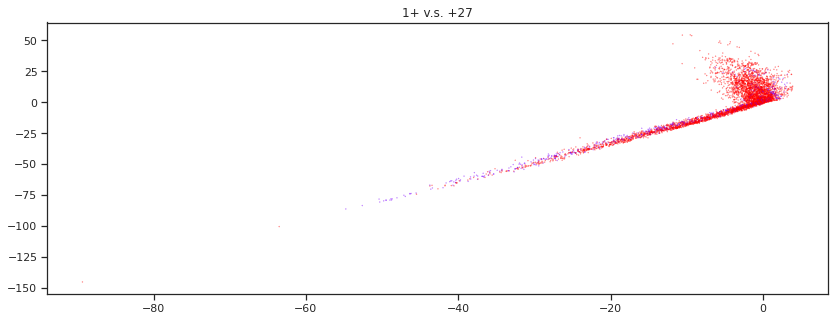

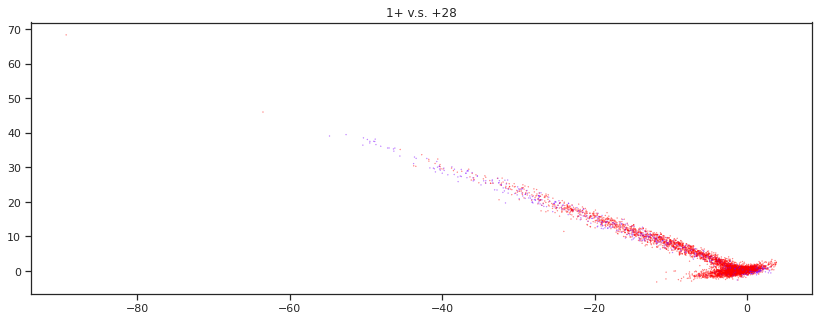

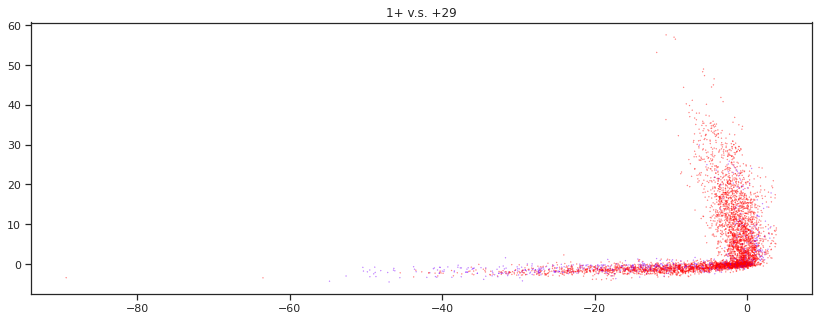

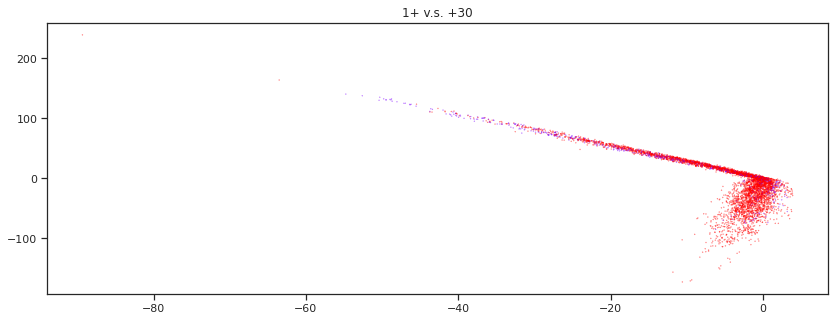

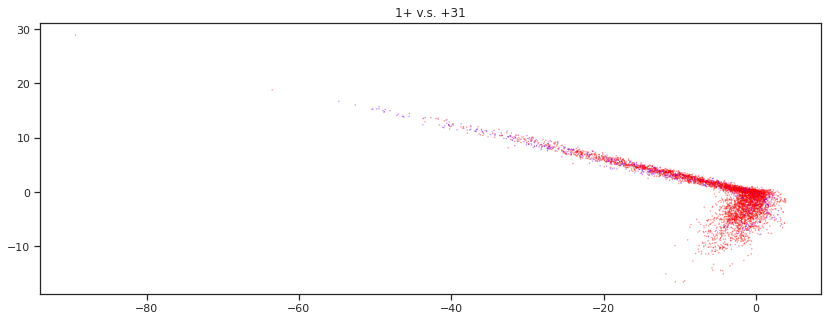

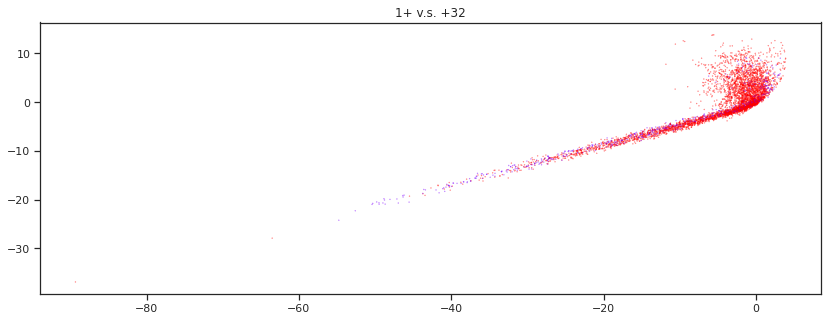

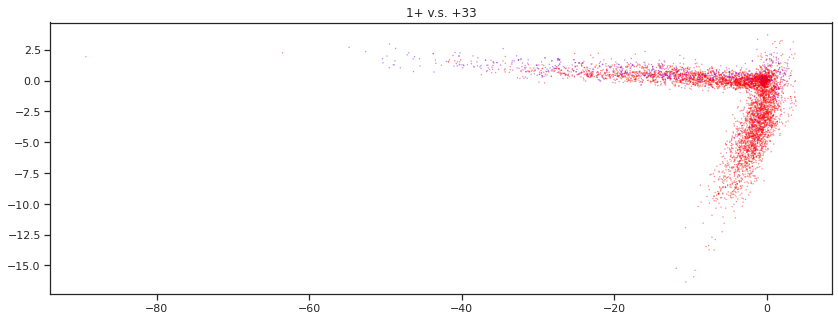

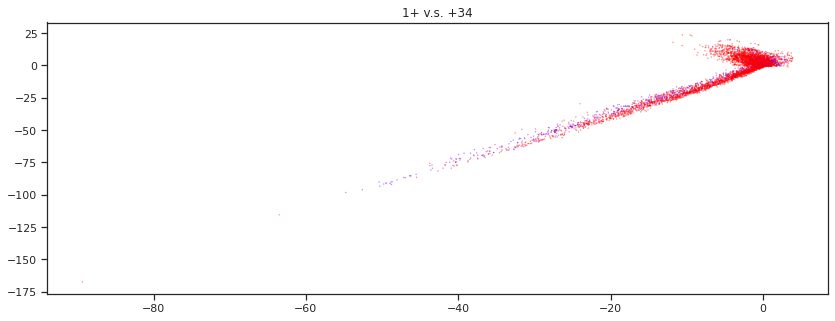





  6%|▌         | 2/35 [00:32<09:19, 16.97s/it]

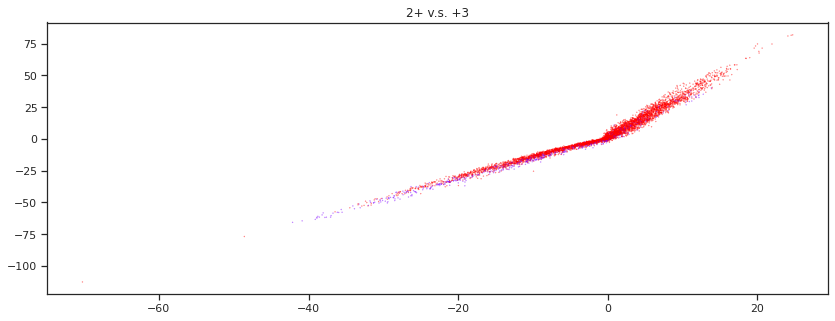

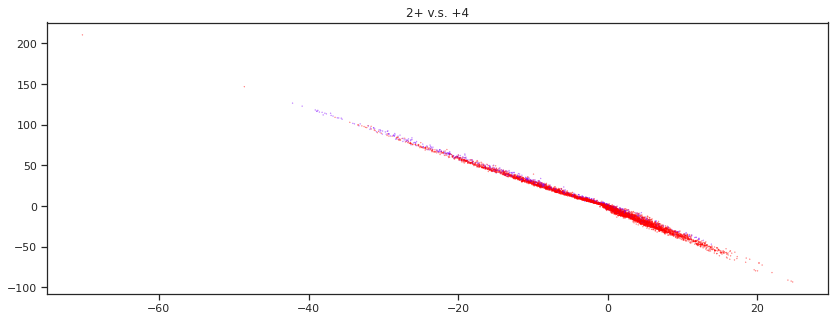

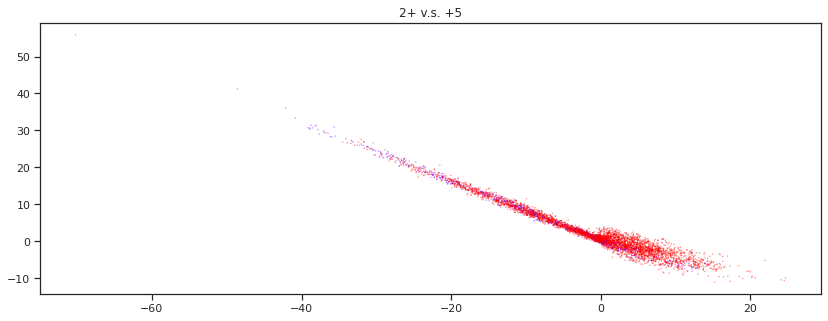

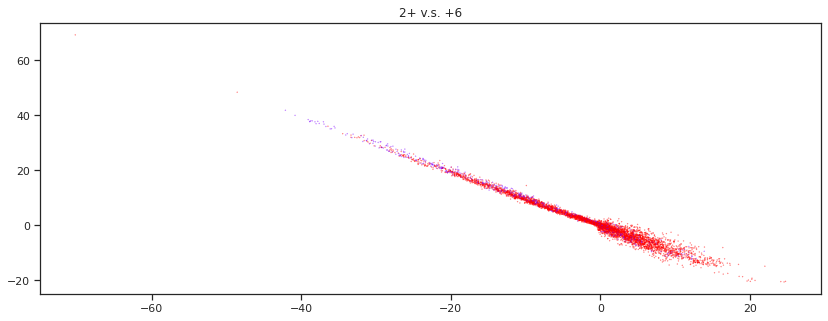

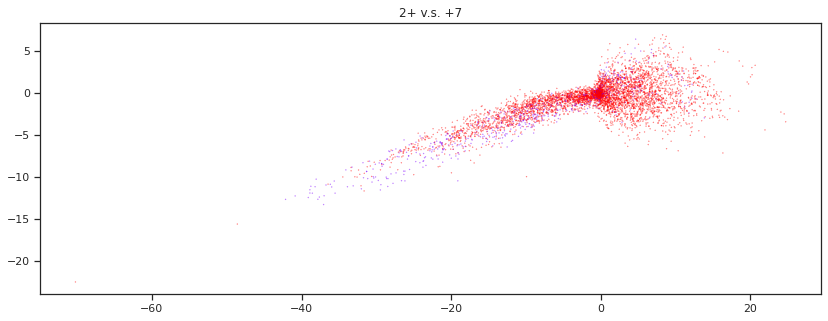

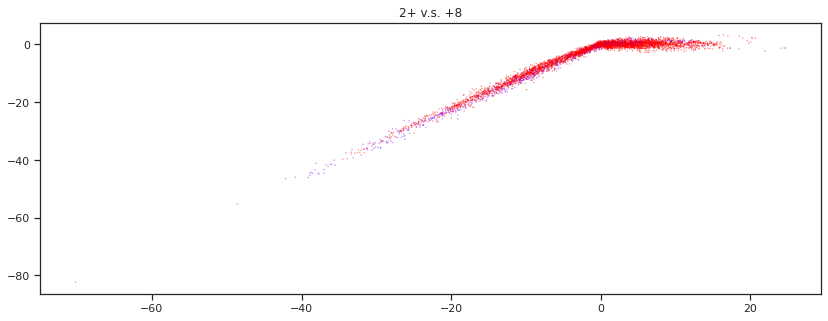

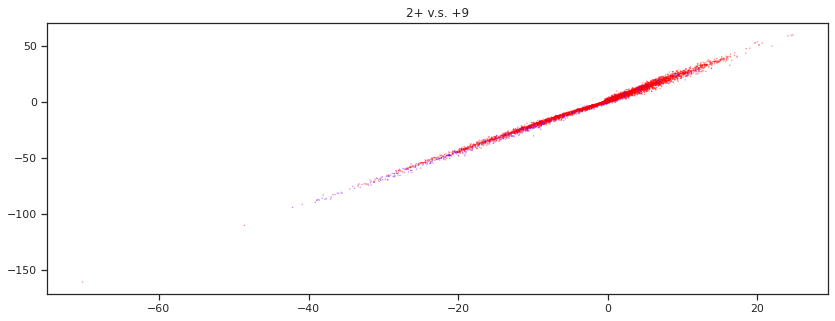

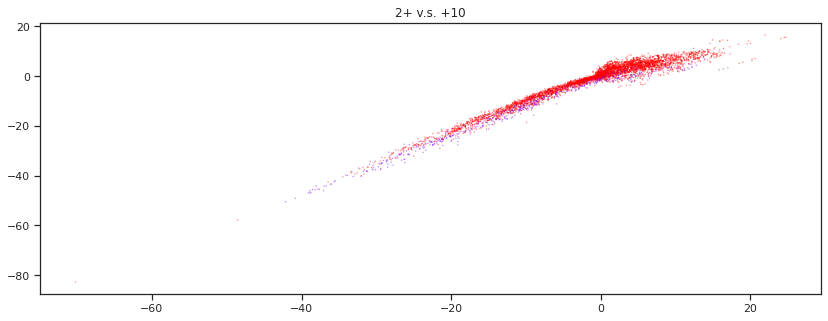

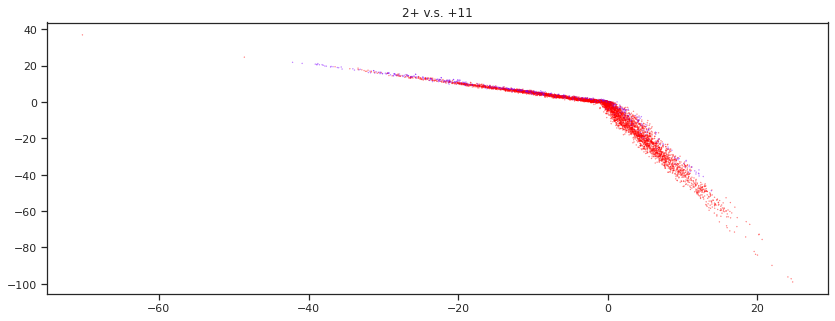

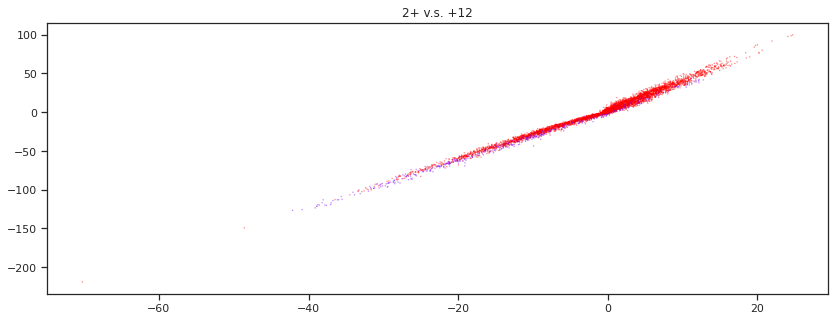

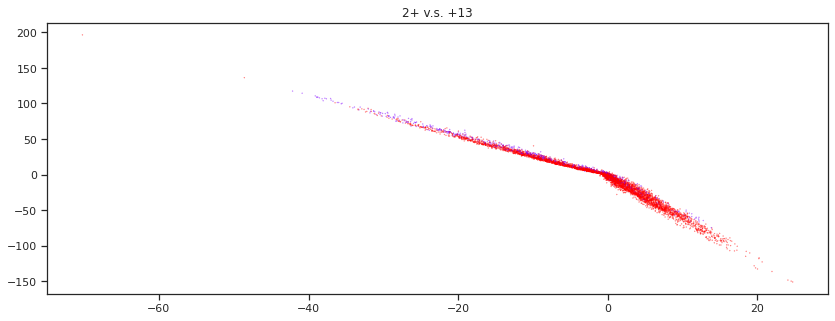

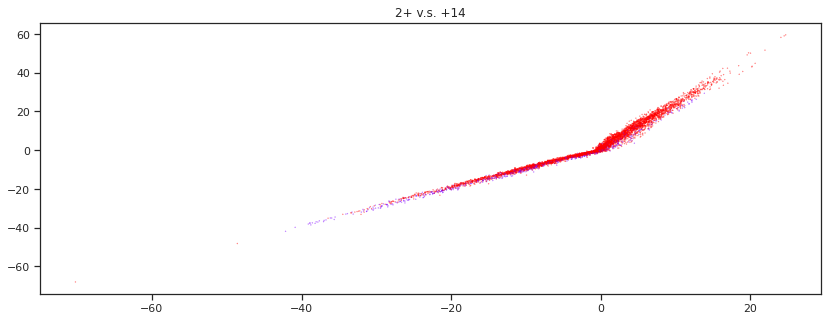

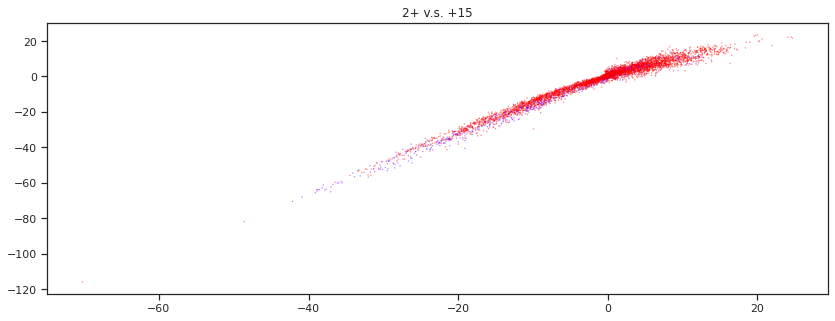

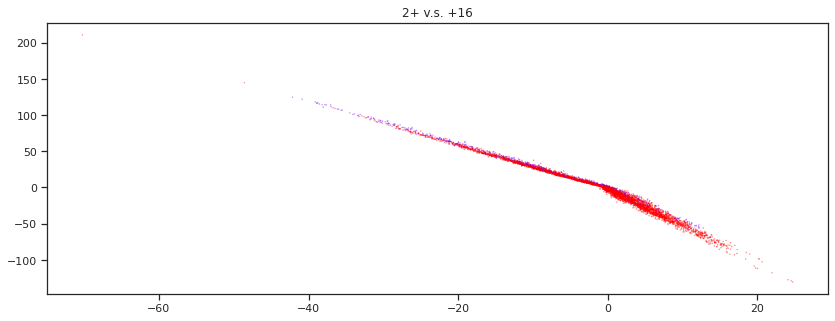

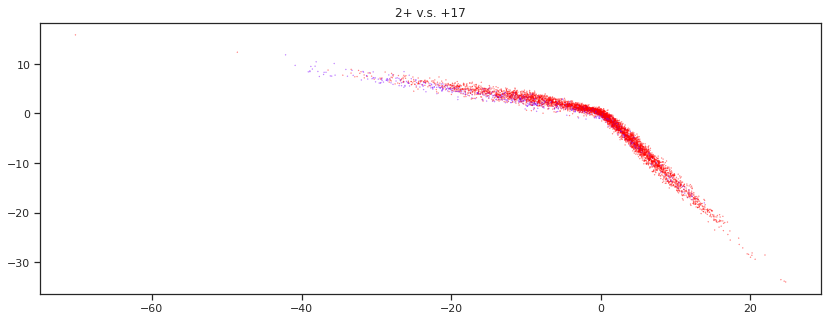

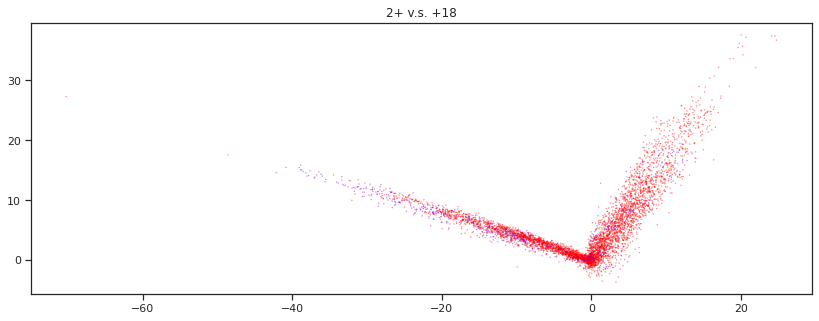

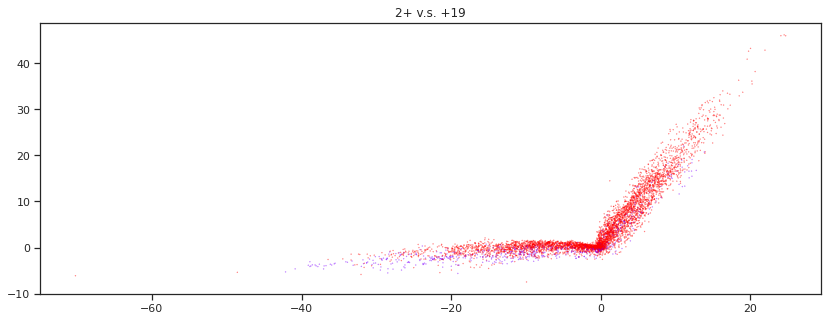

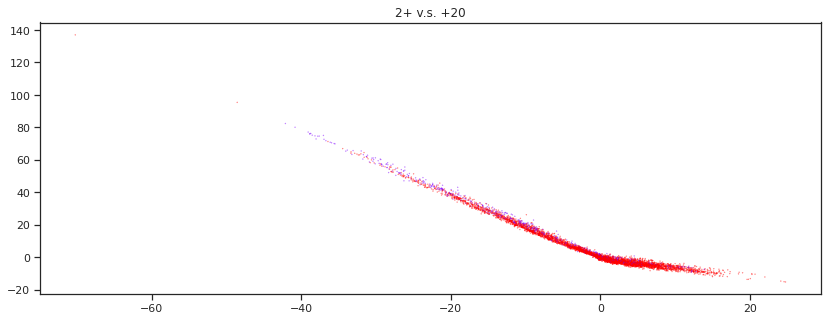

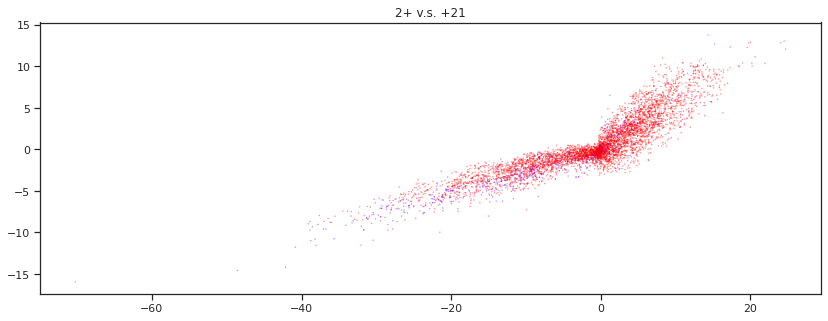

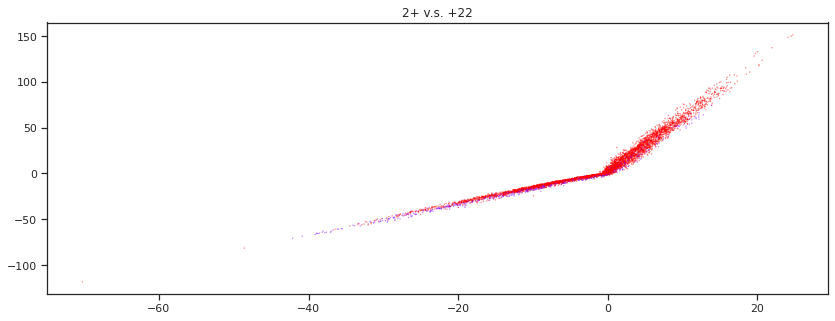

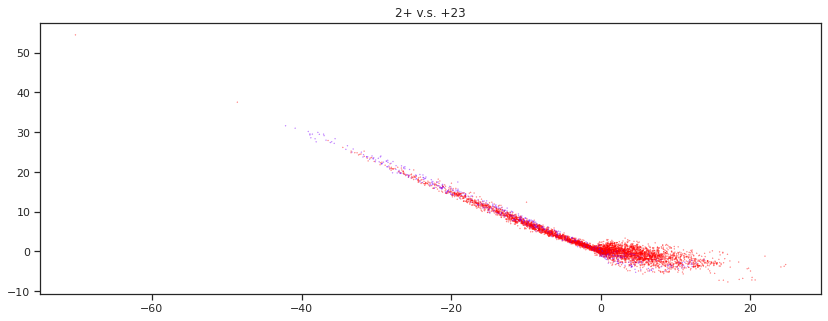

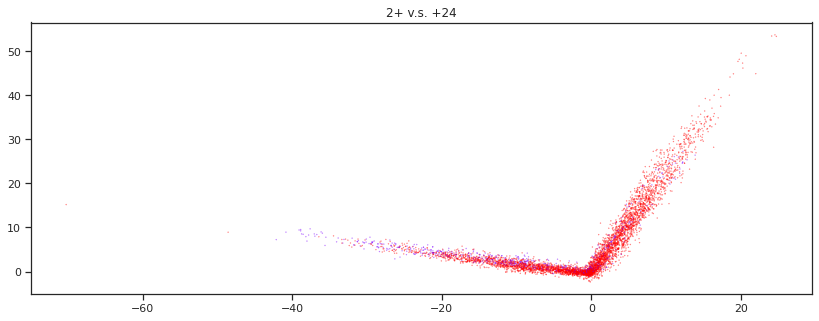

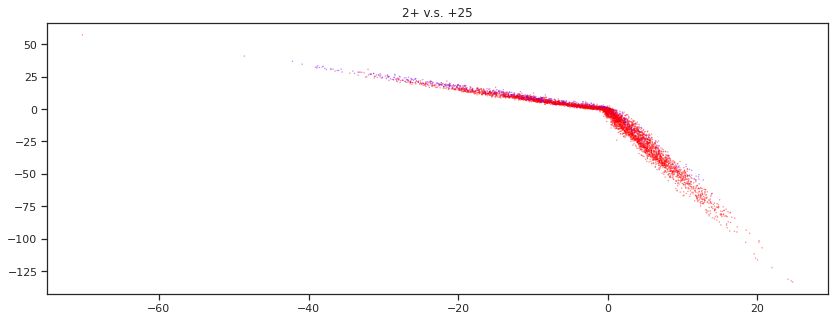

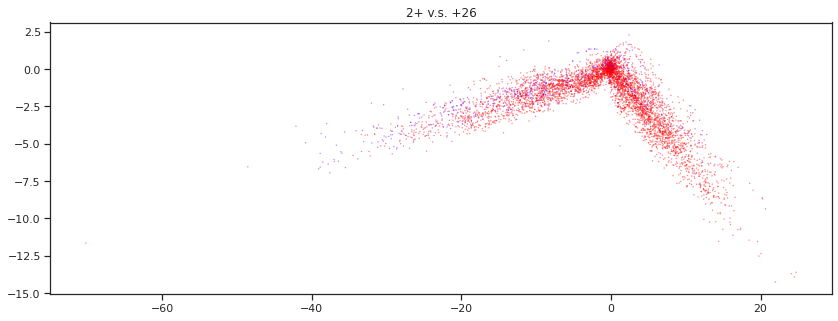

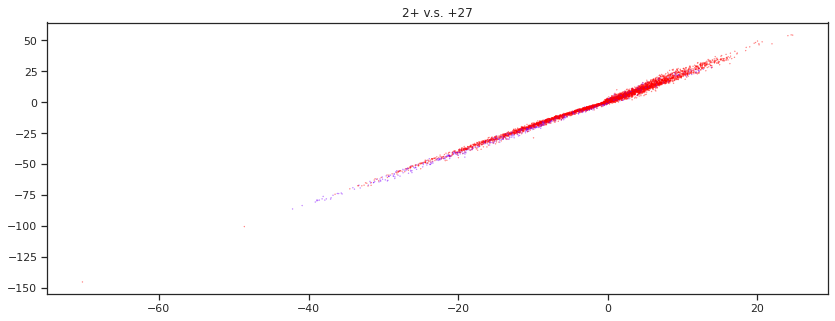

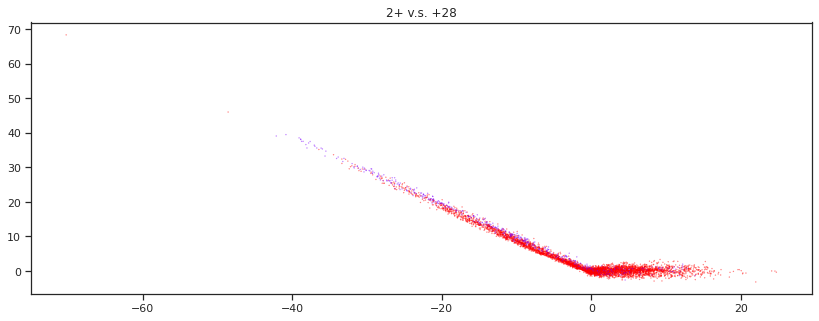

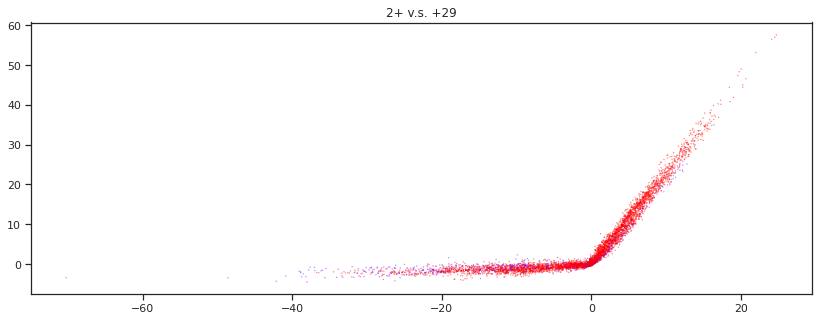

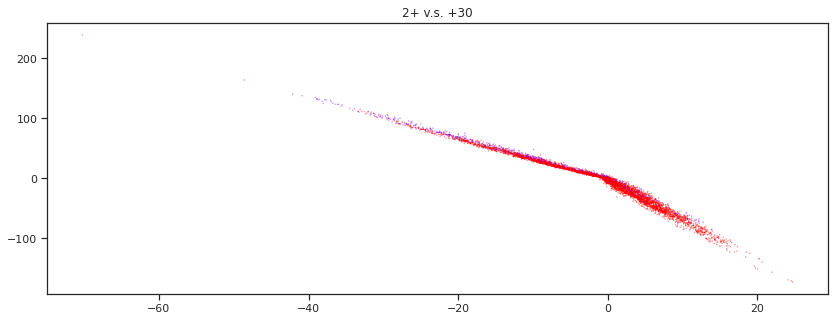

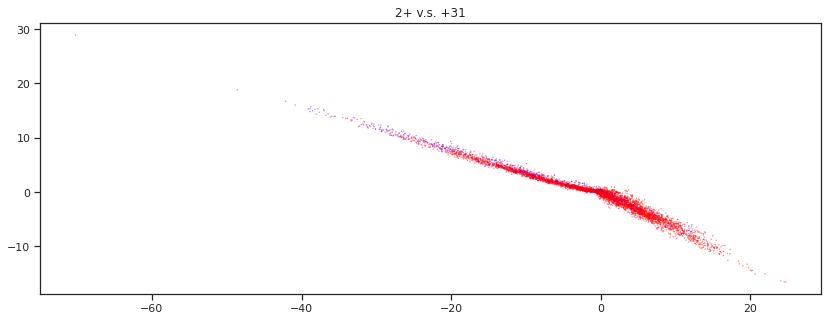

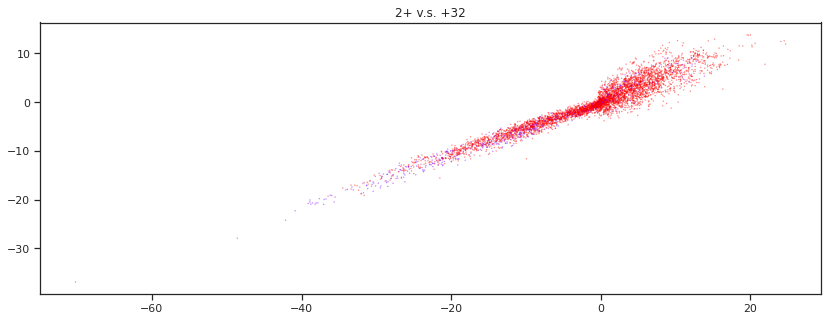

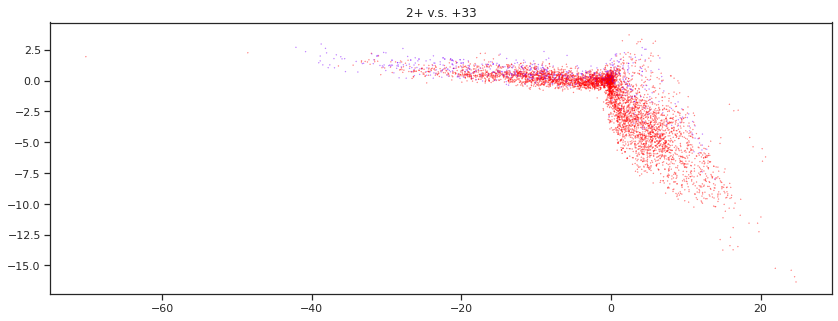

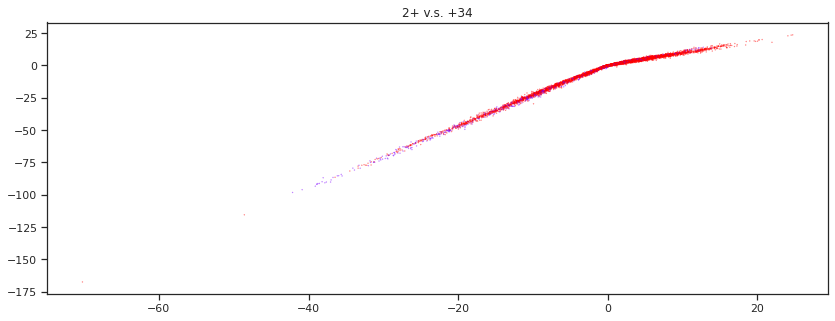





  9%|▊         | 3/35 [00:47<08:42, 16.34s/it]

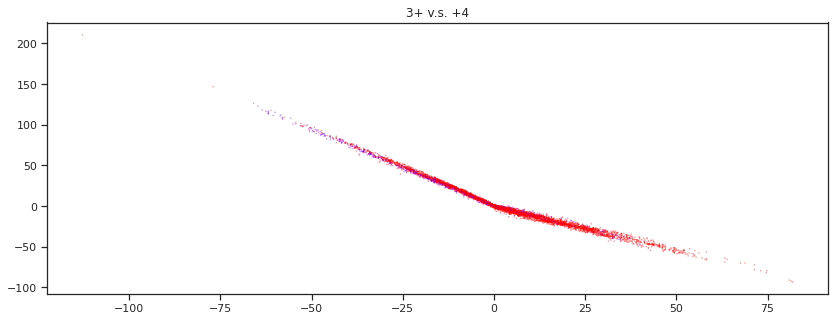

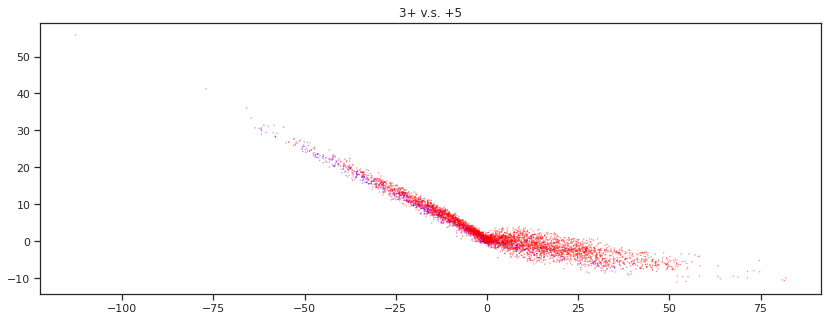

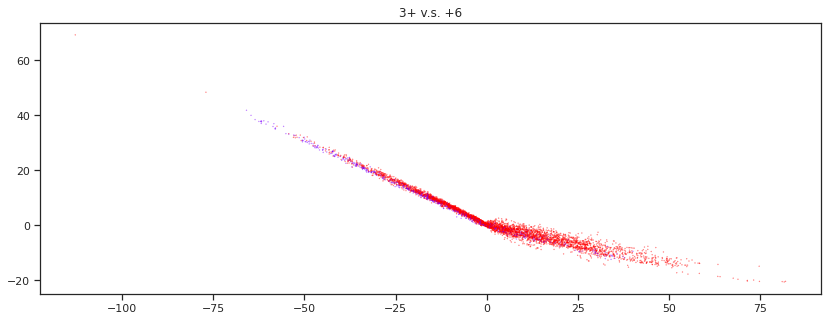

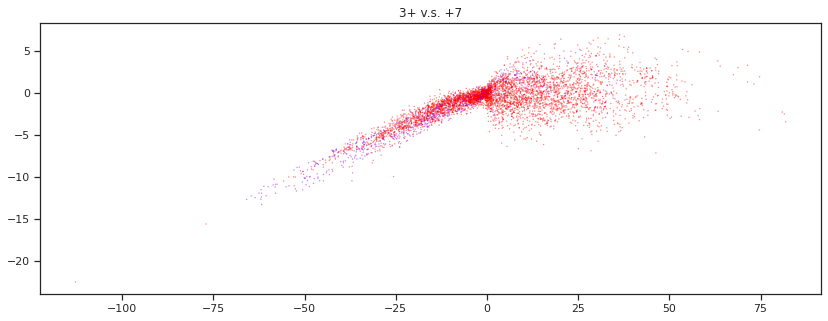

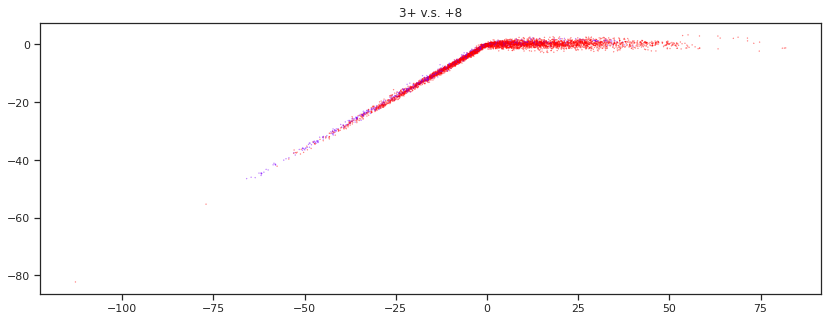

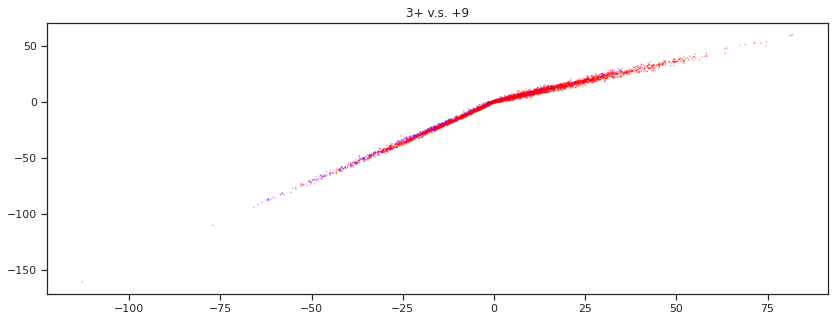

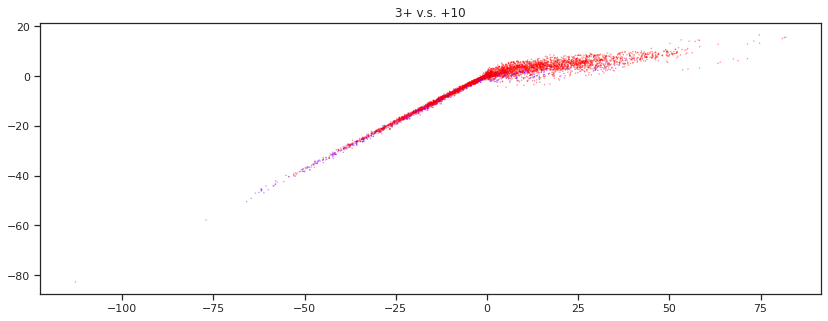

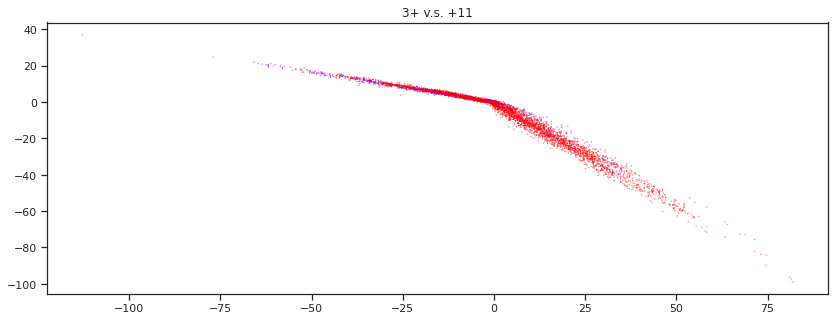

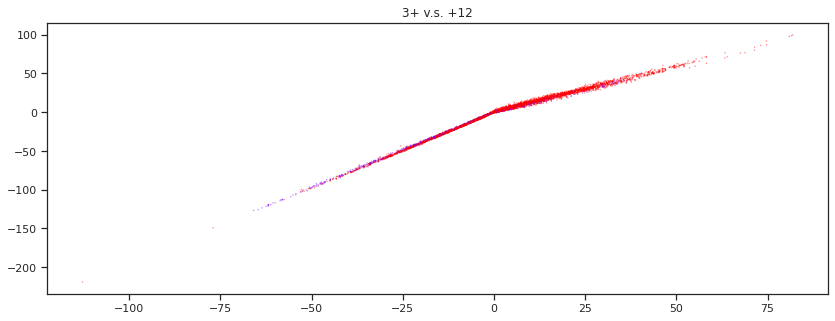

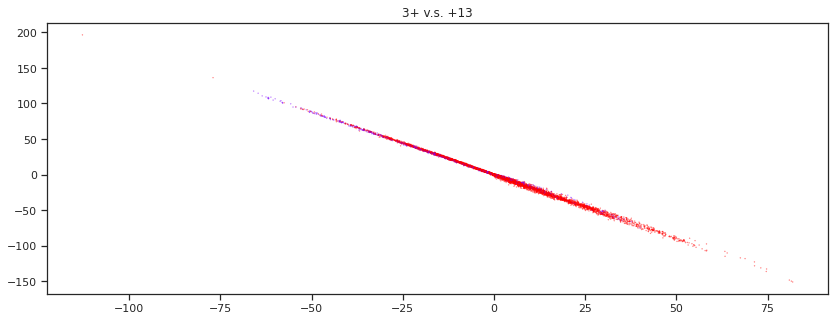

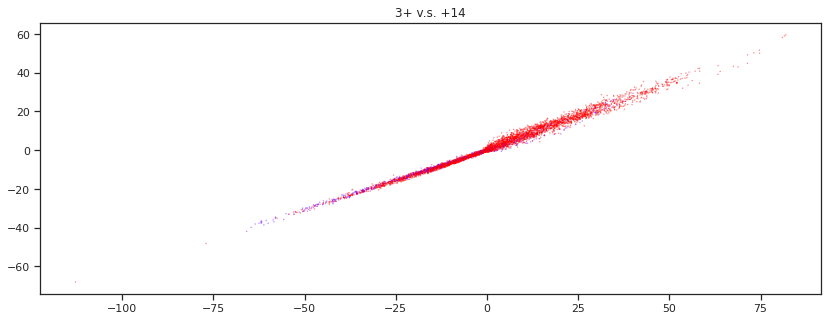

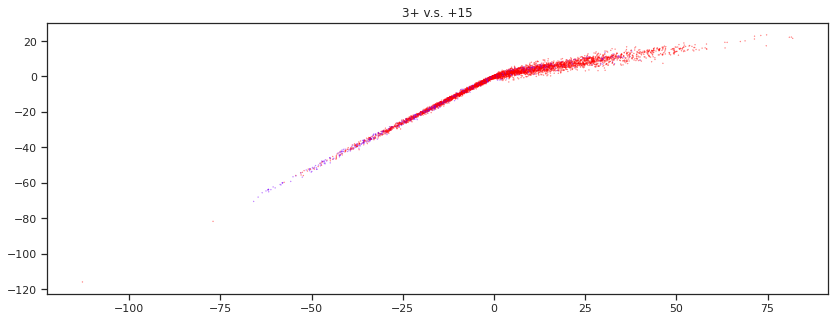

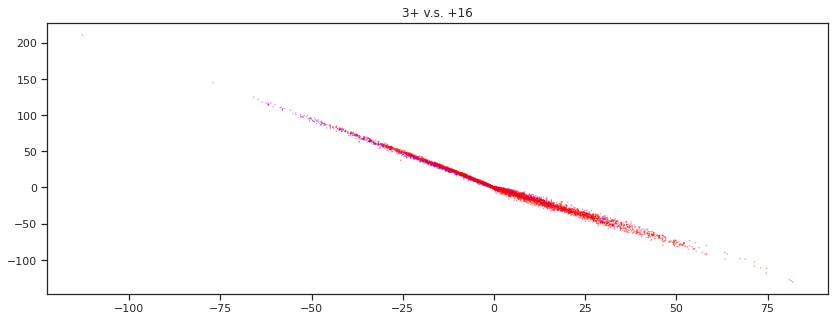

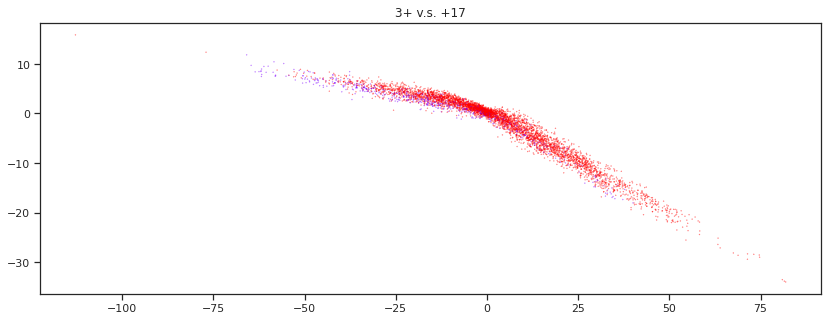

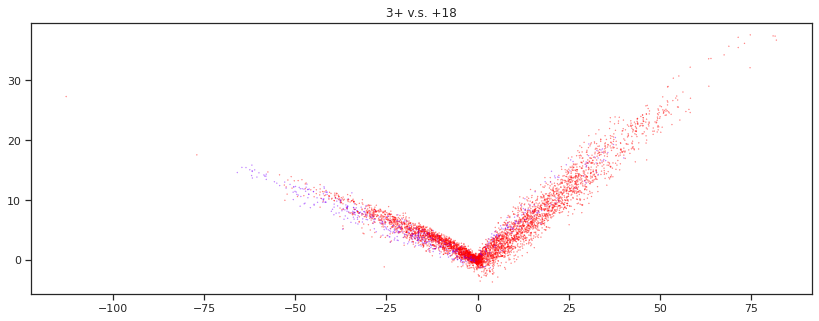

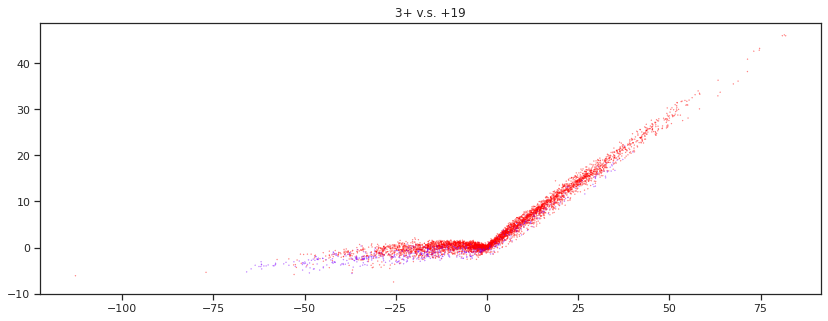

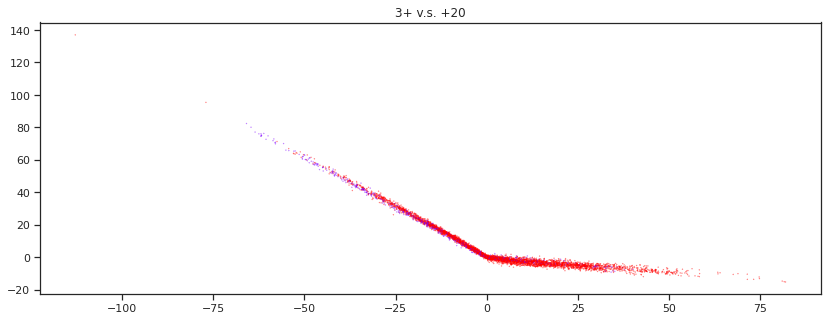

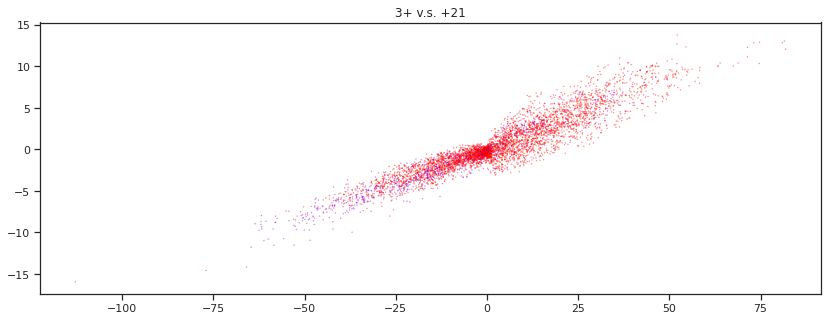

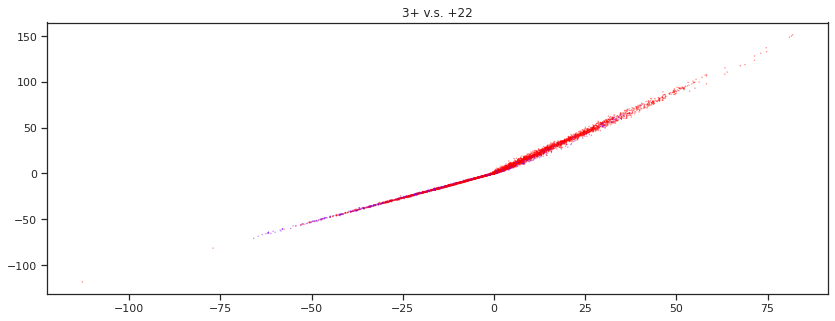

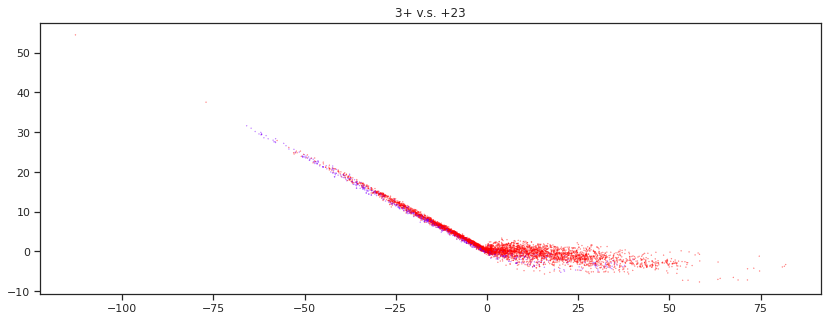

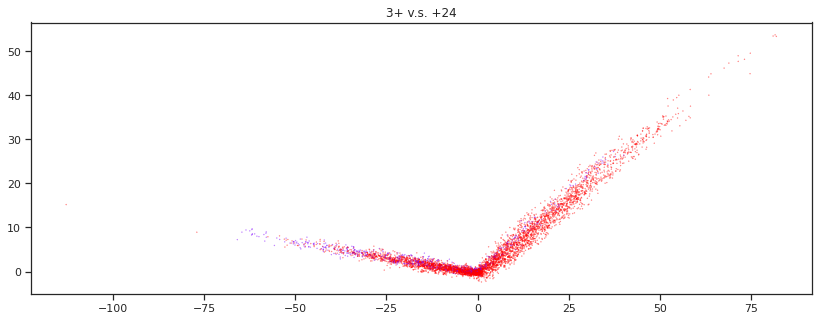

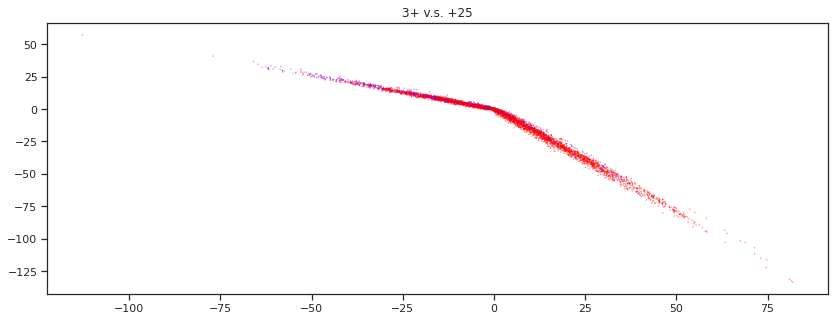

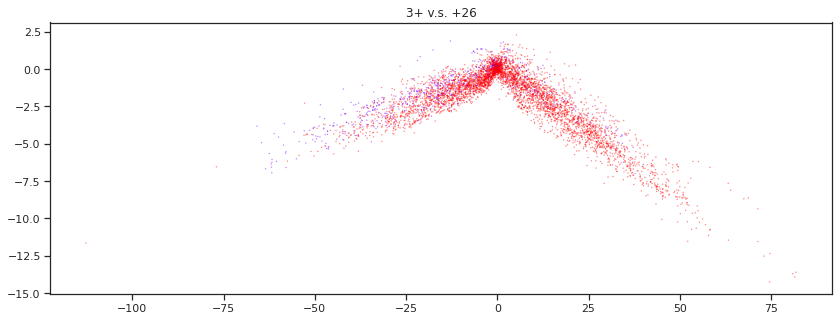

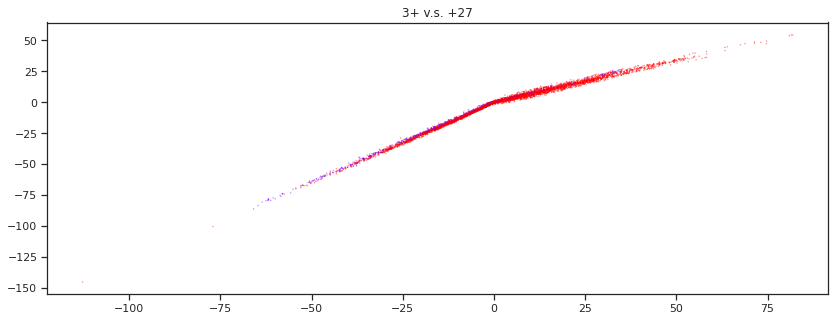

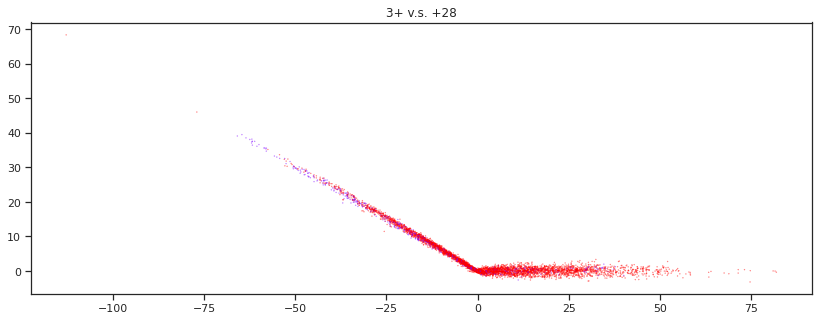

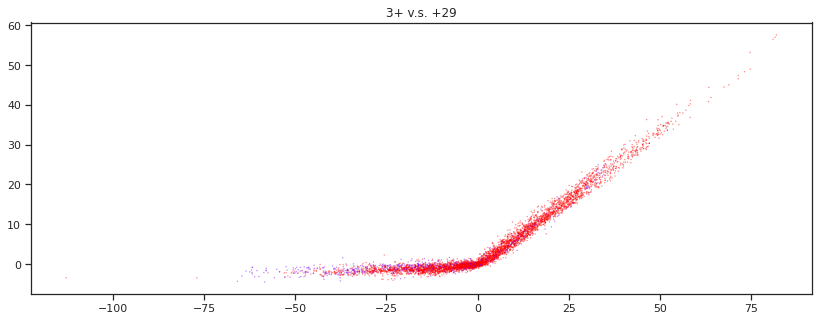

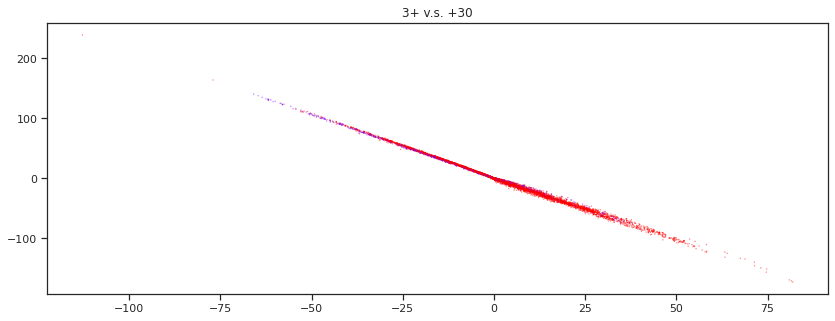

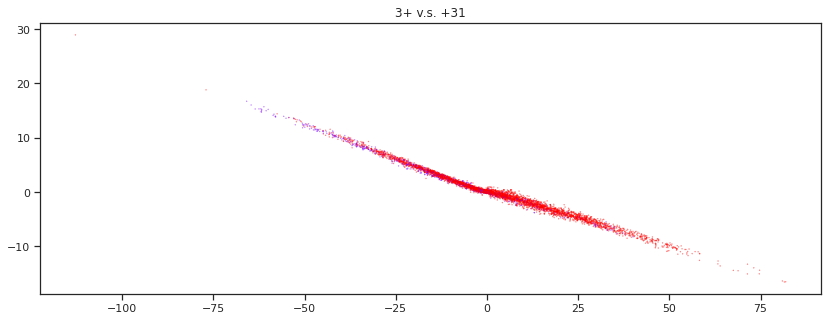

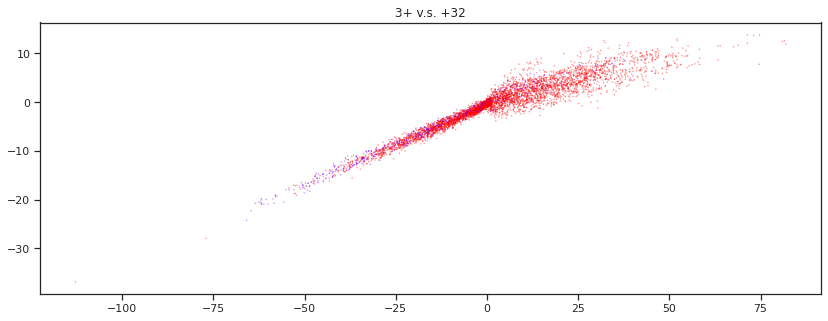

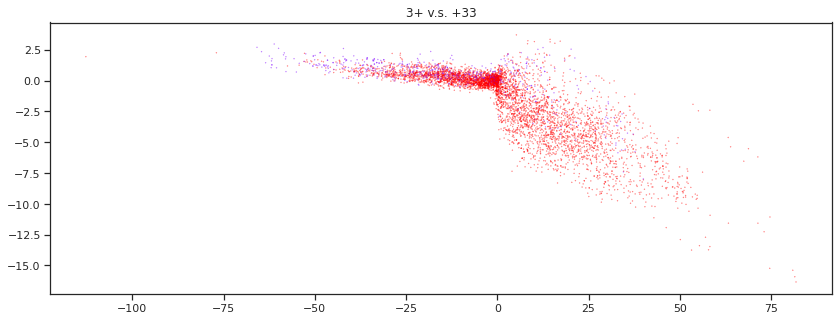

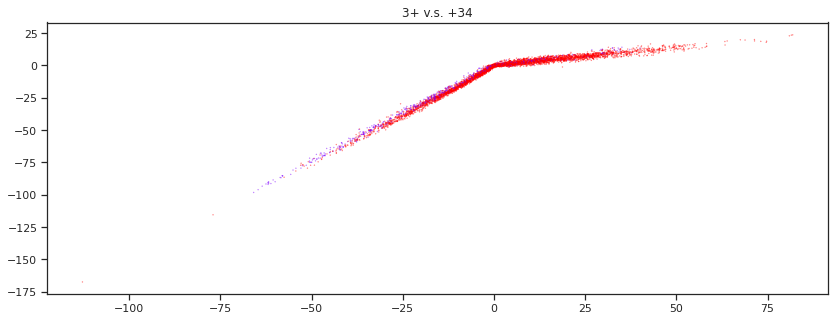





 11%|█▏        | 4/35 [01:02<08:12, 15.89s/it]

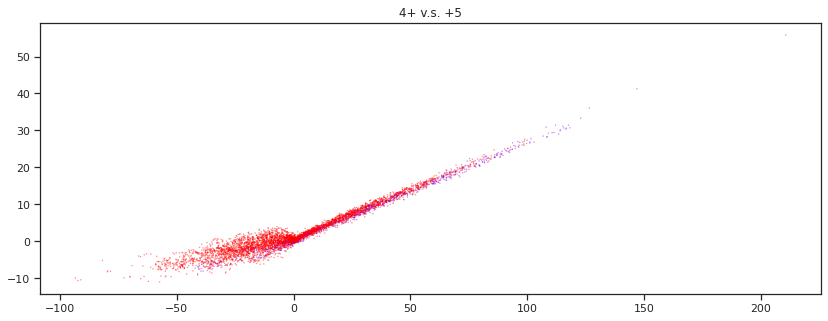

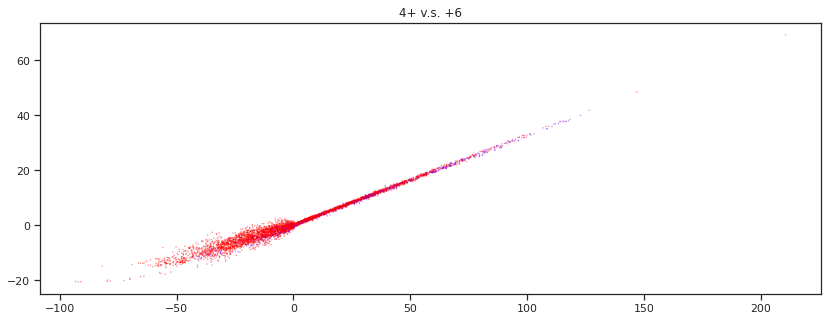

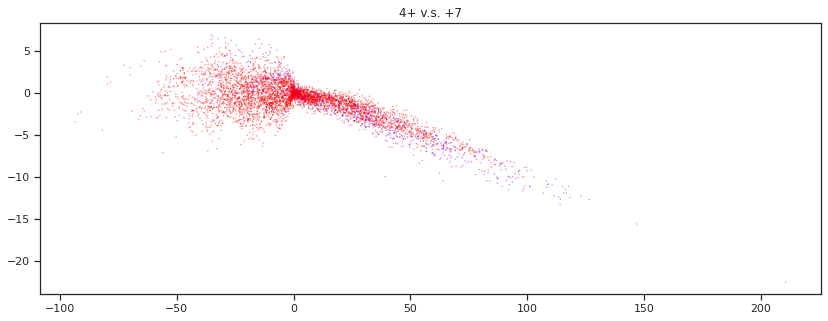

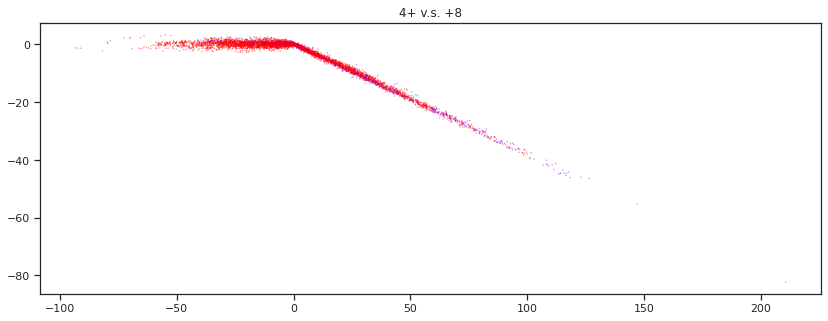

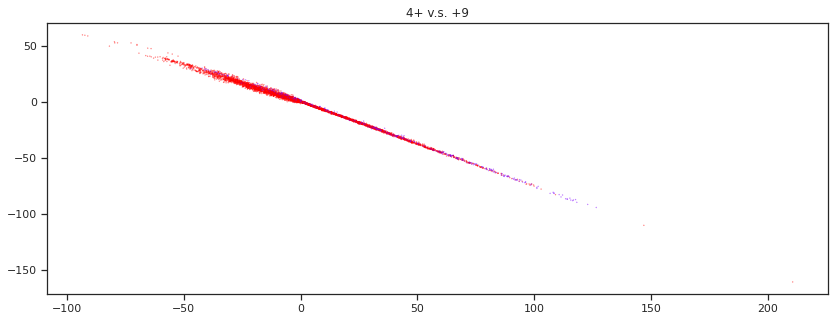

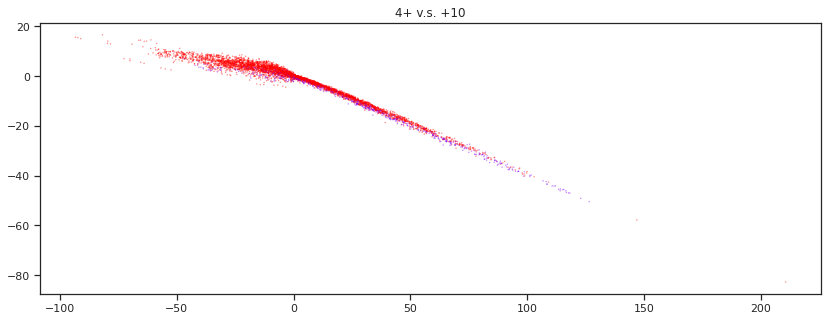

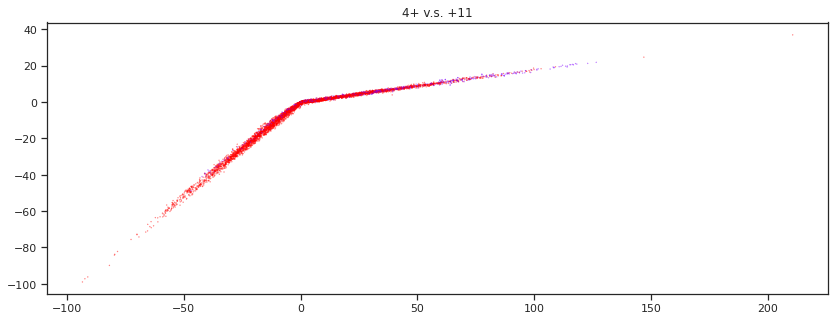

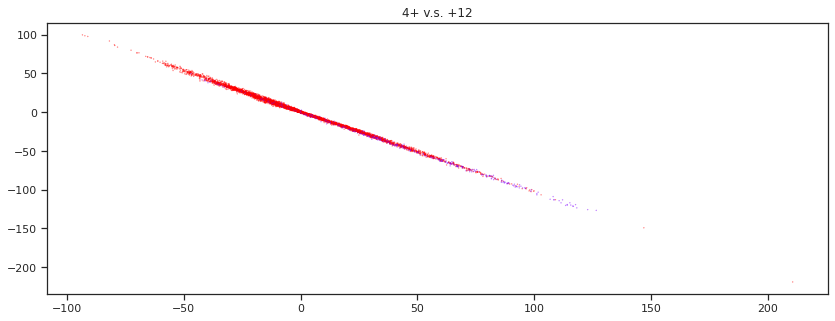

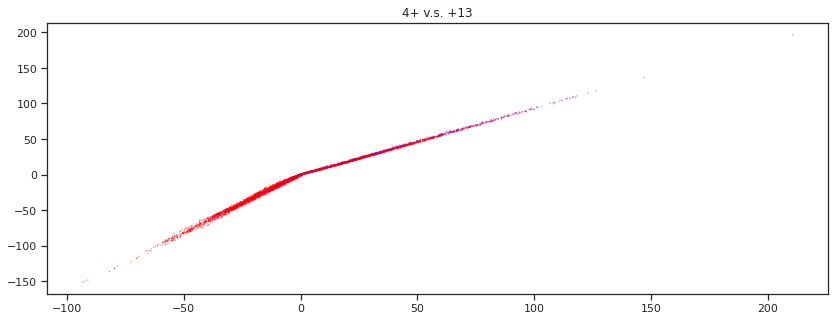

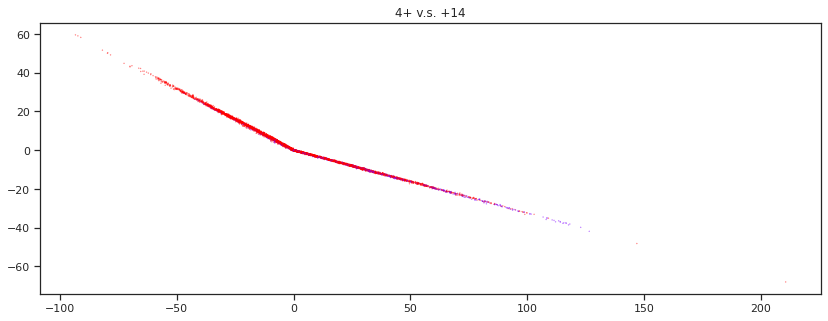

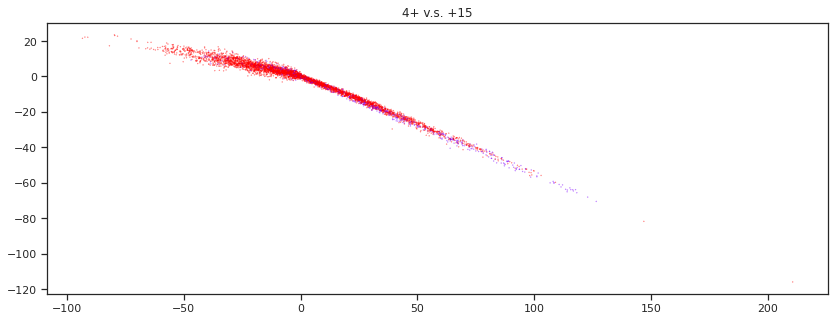

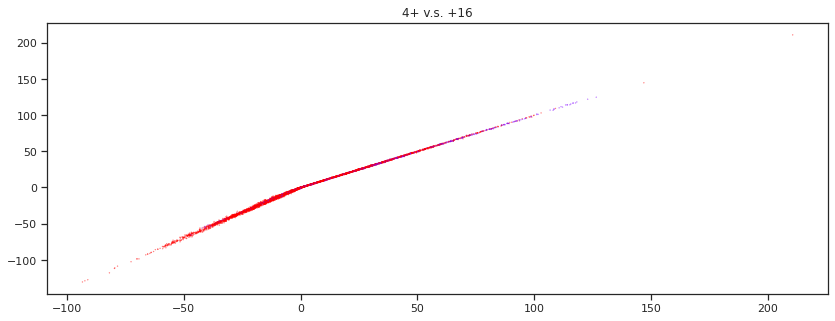

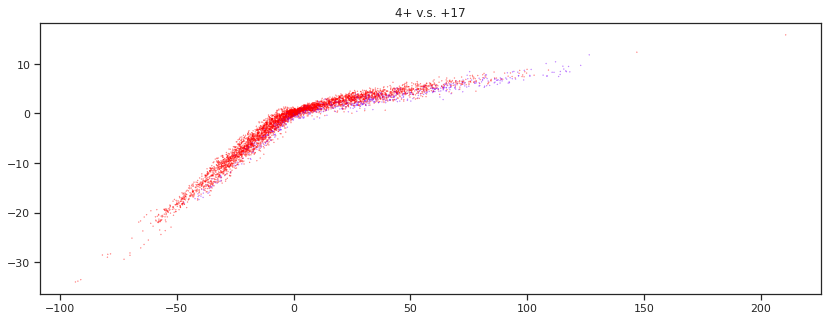

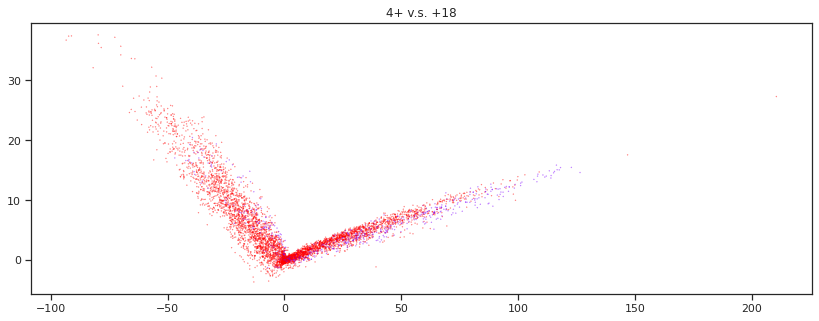

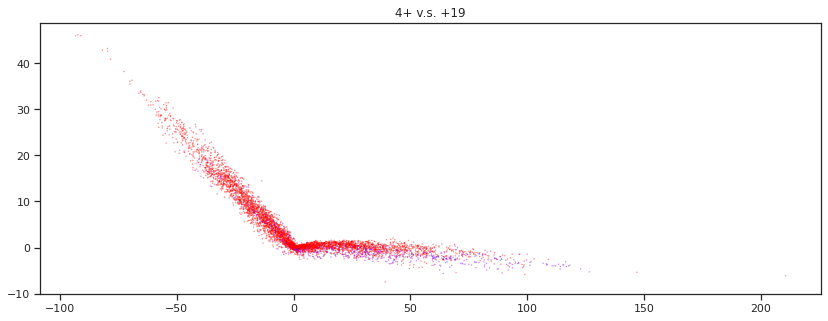

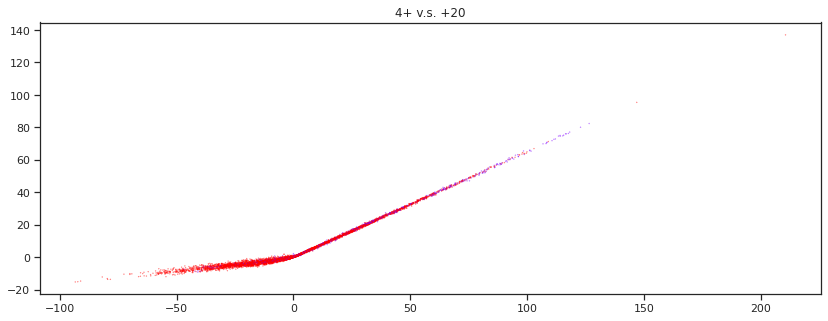

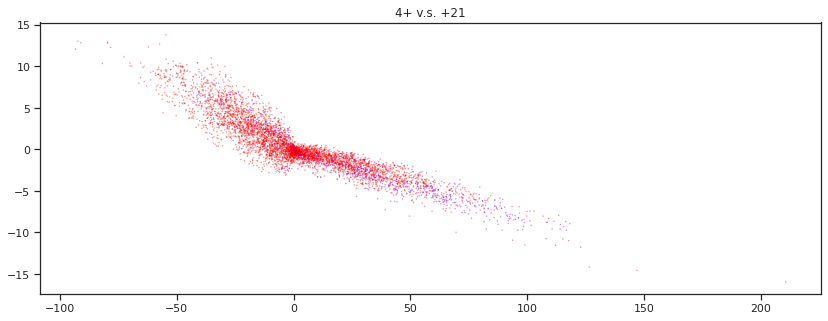

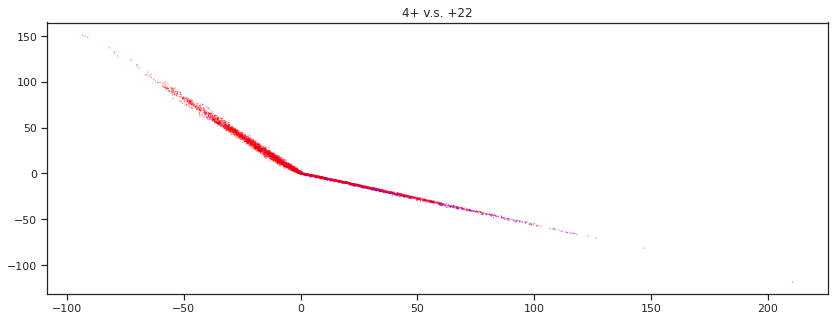

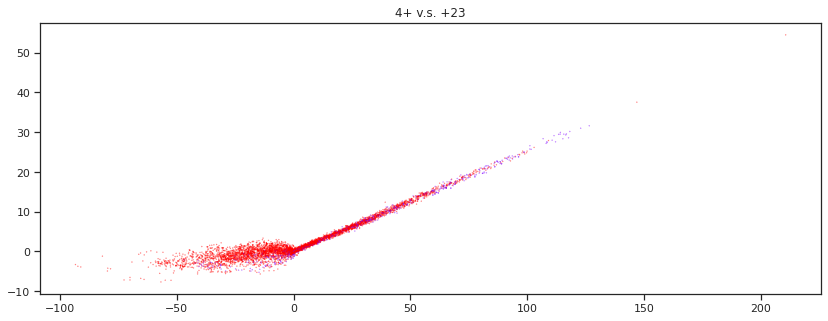

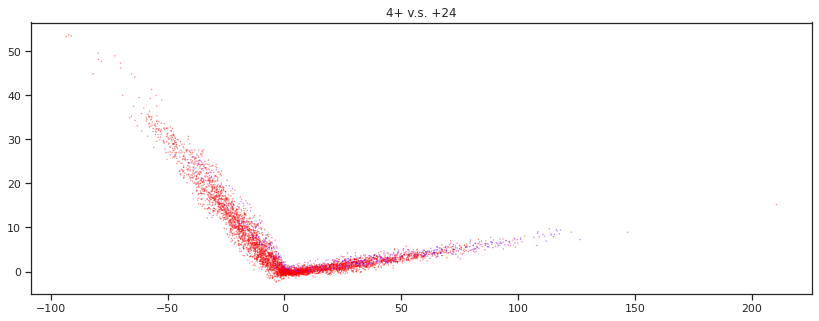

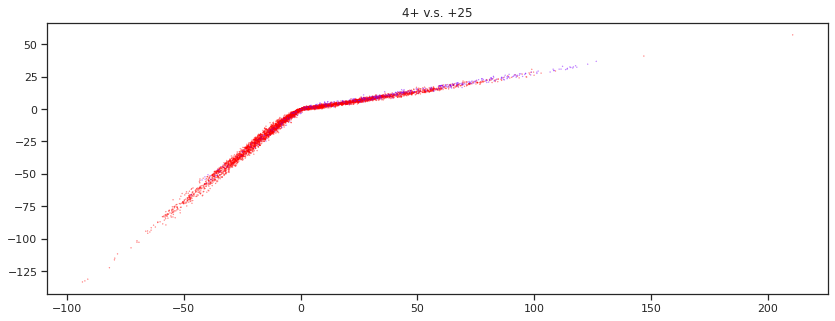

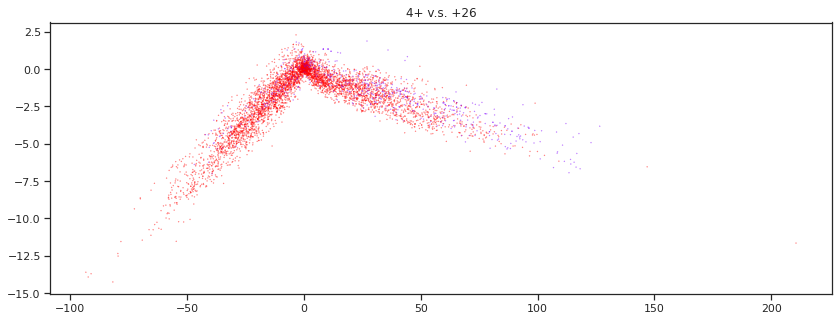

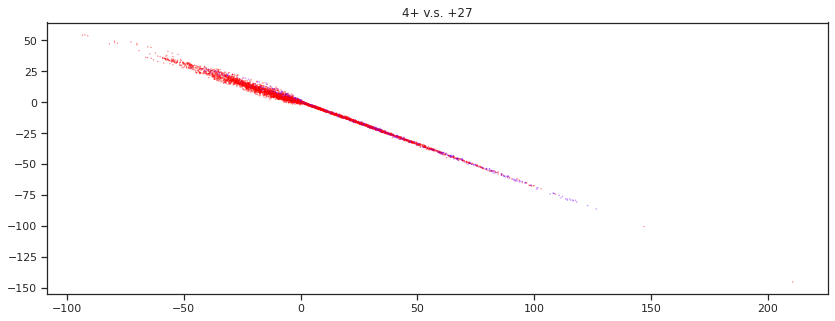

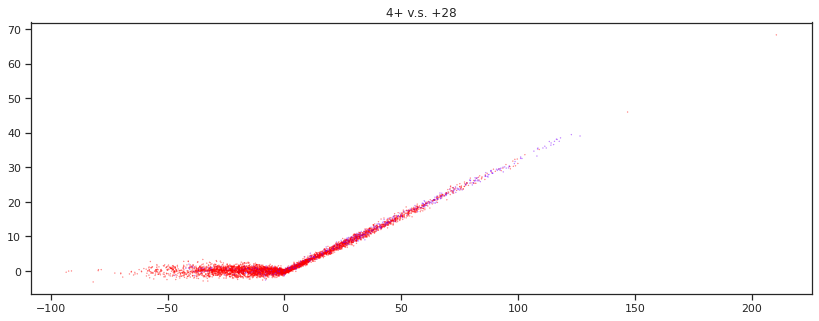

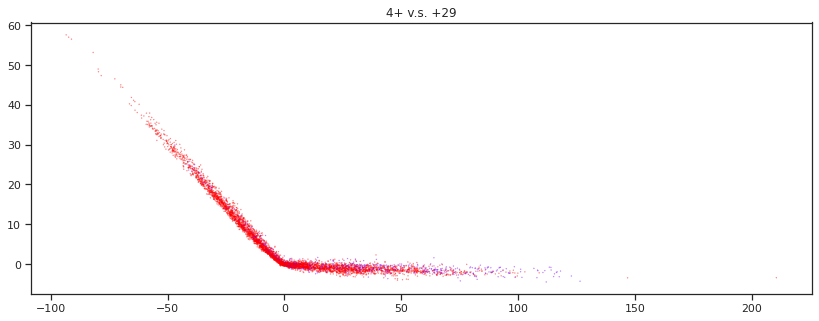

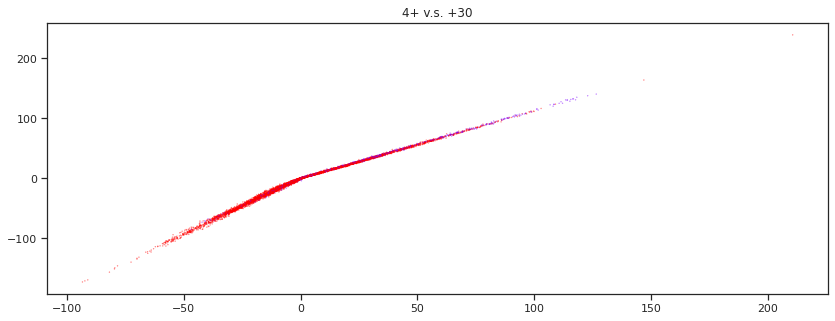

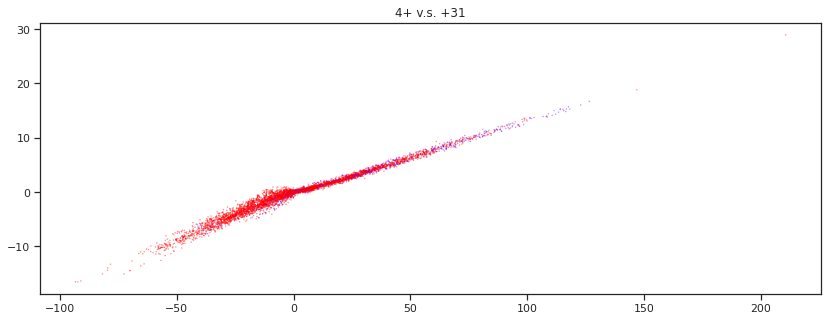

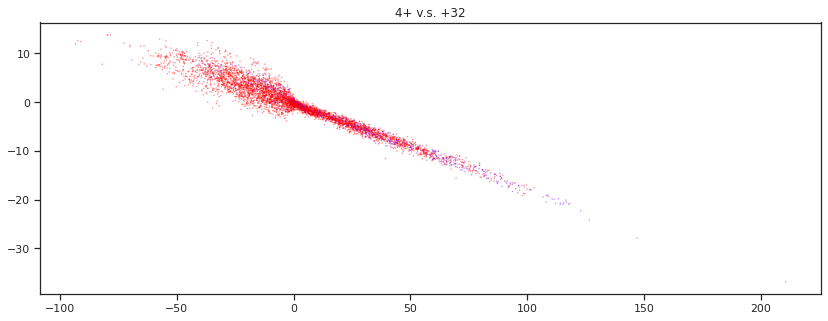

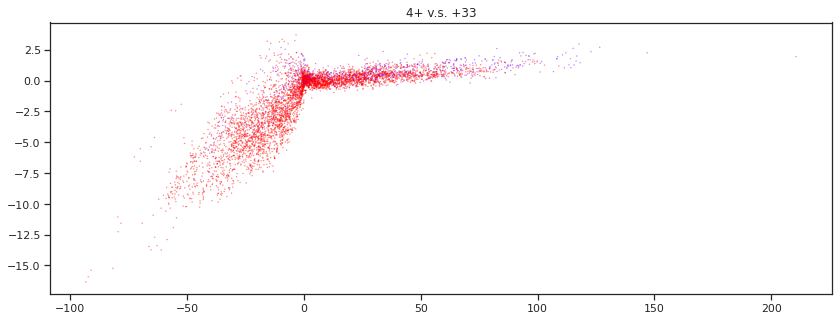

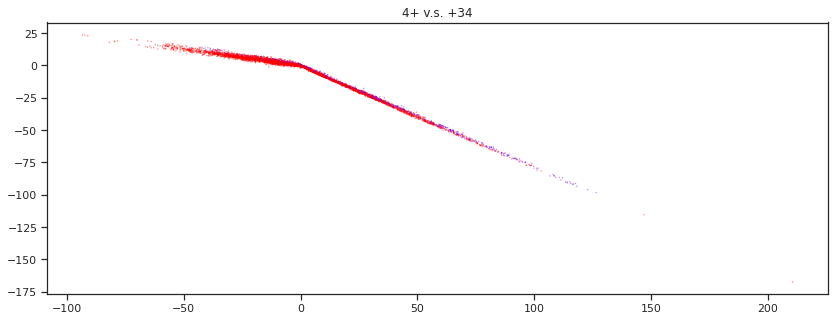





 14%|█▍        | 5/35 [01:17<07:44, 15.49s/it]

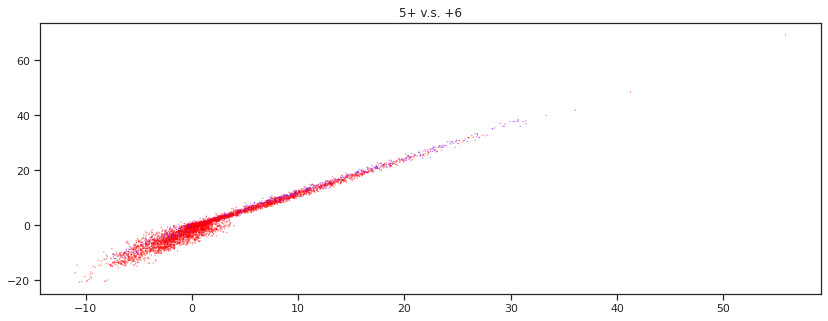

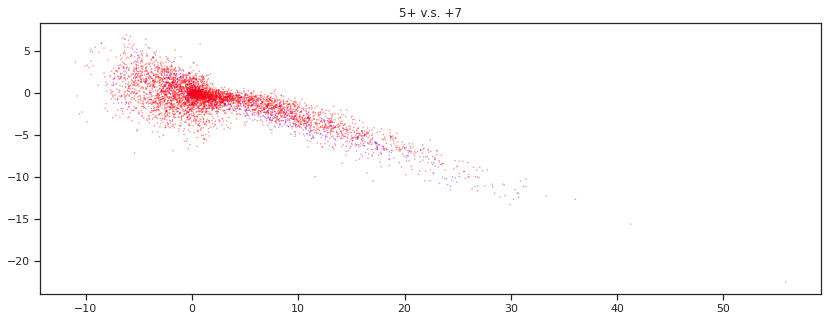

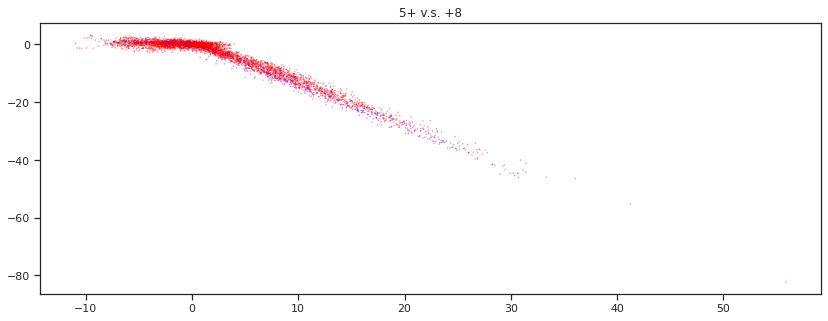

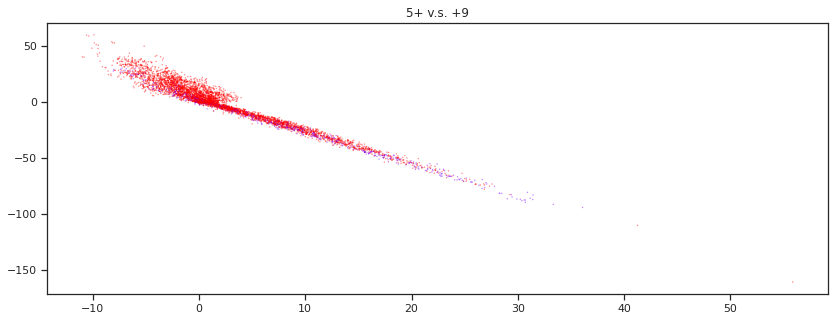

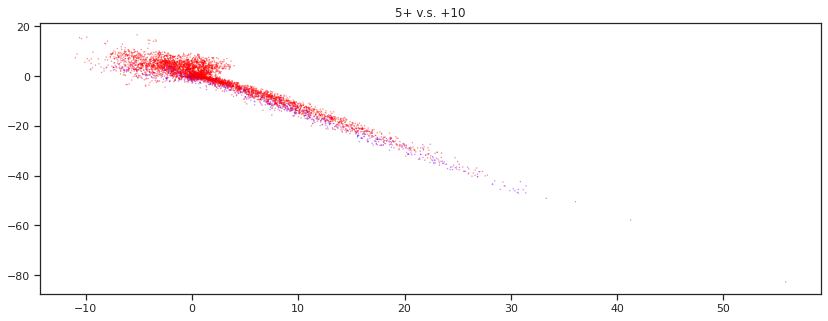

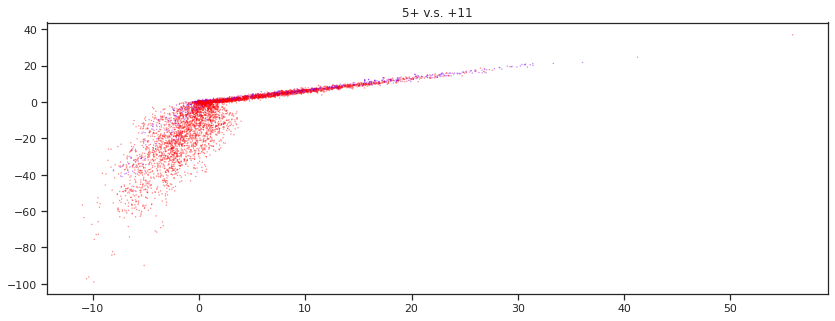

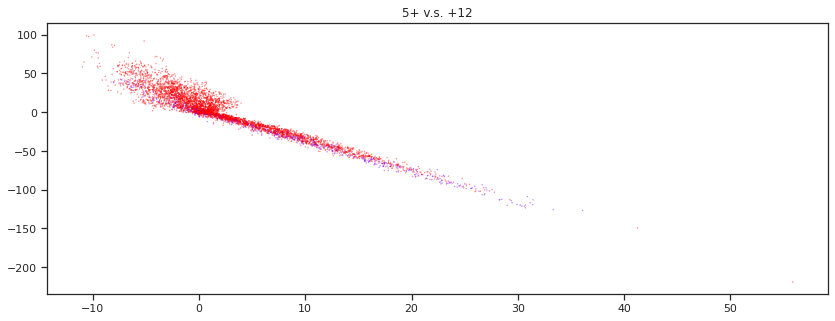

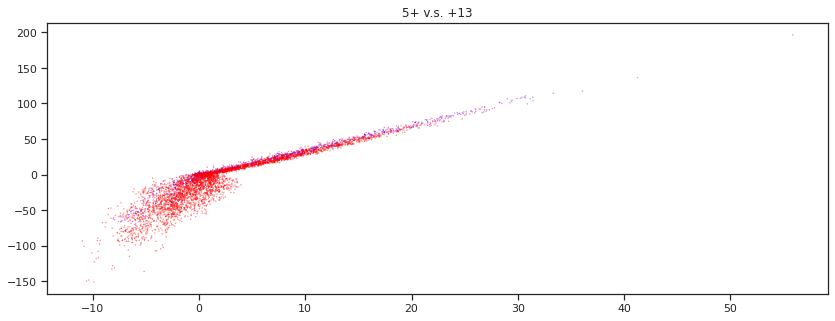

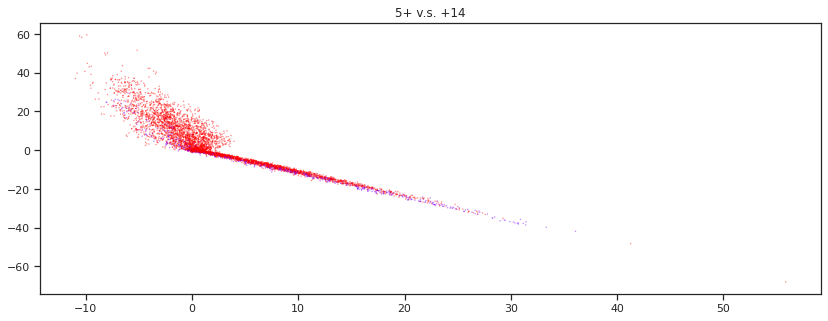

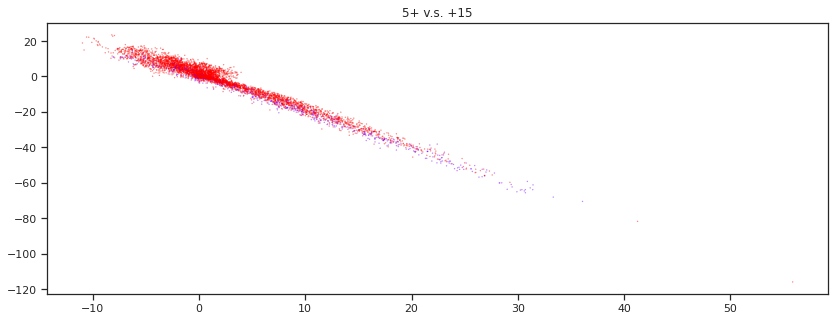

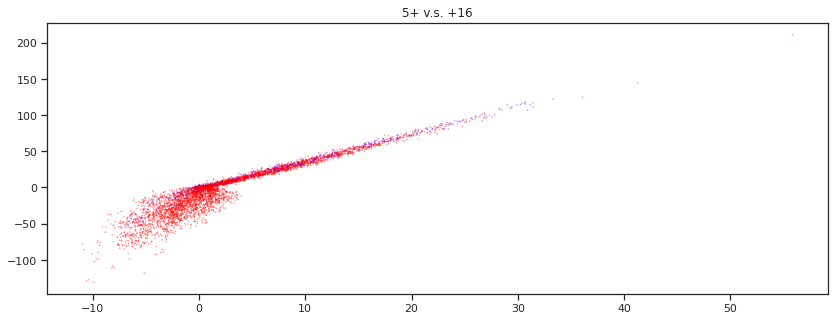

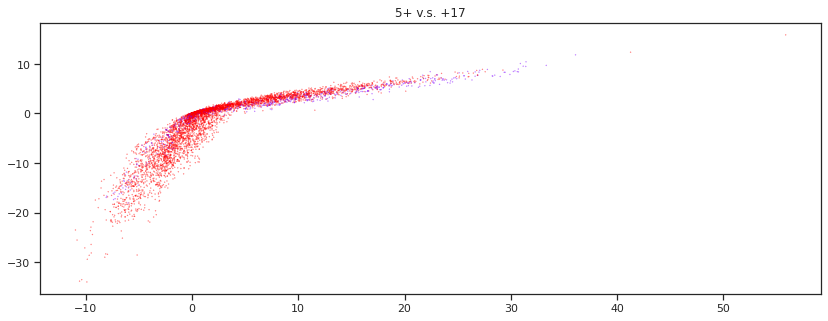

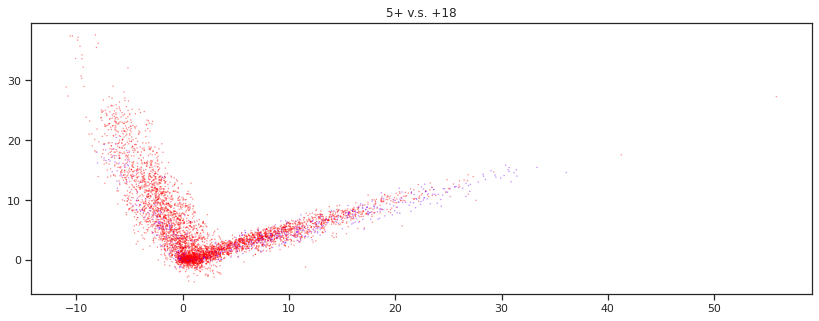

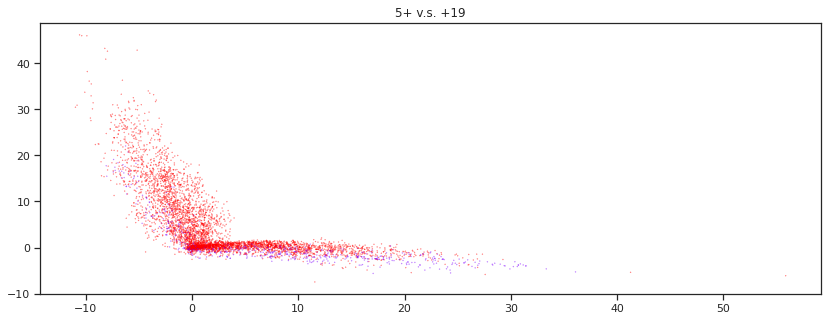

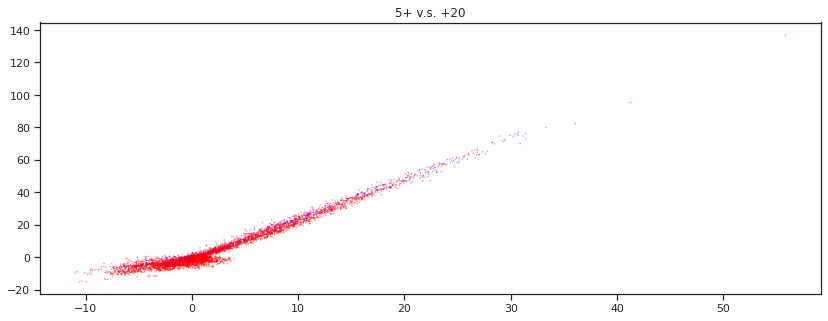

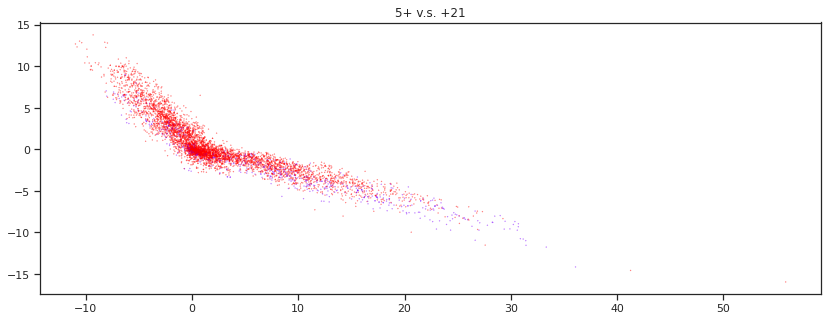

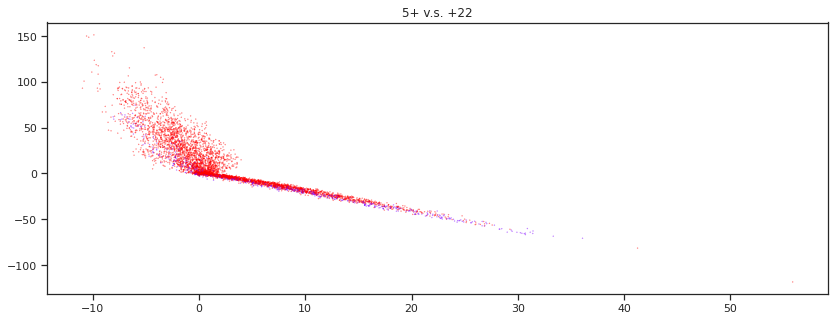

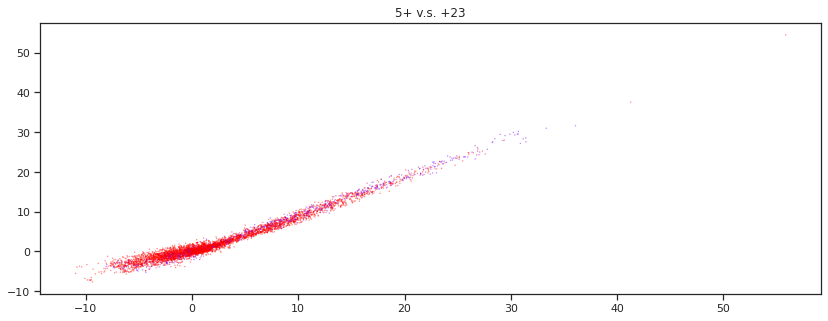

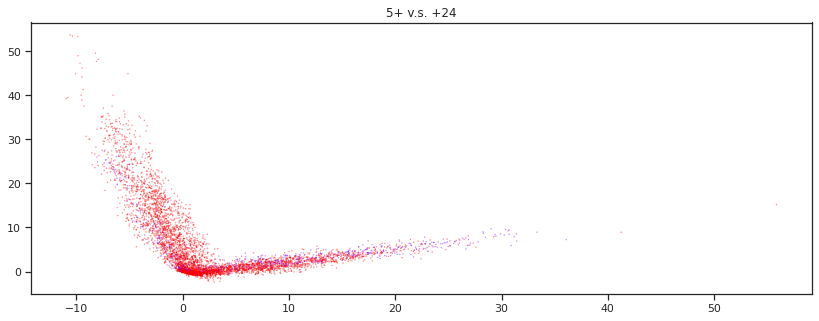

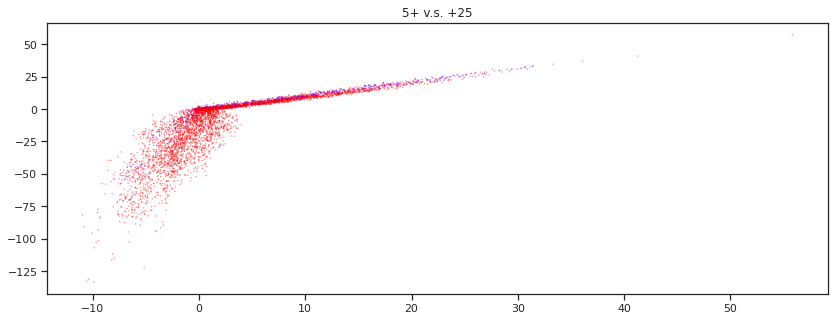

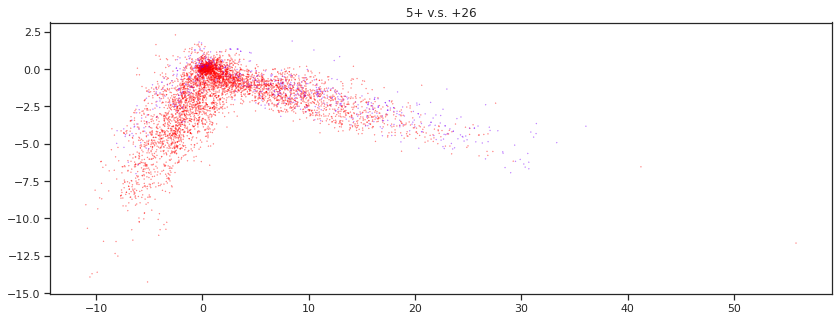

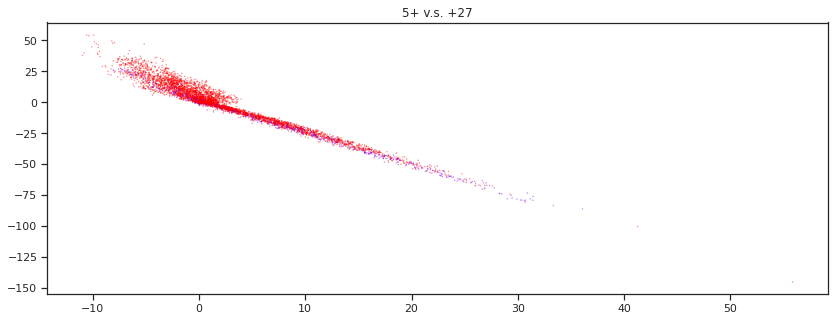

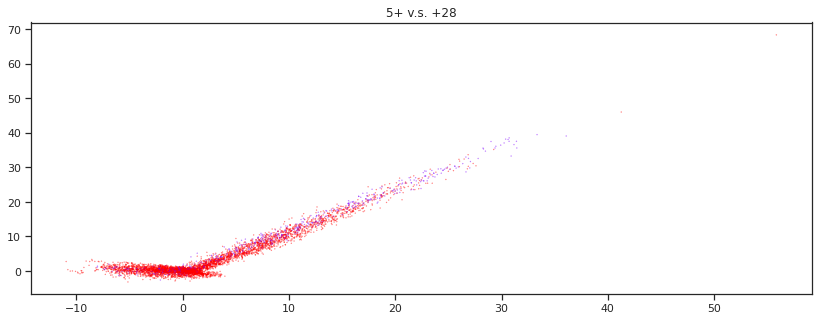

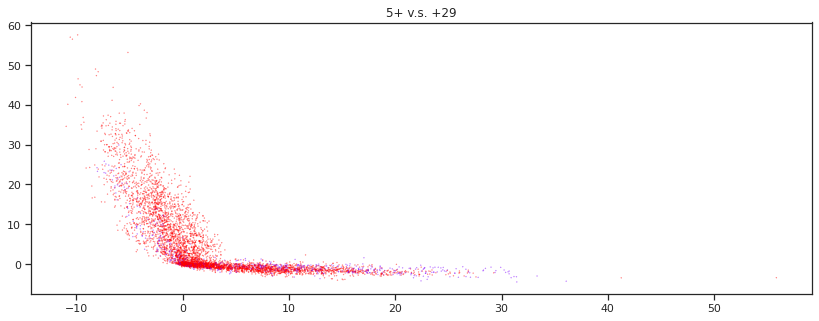

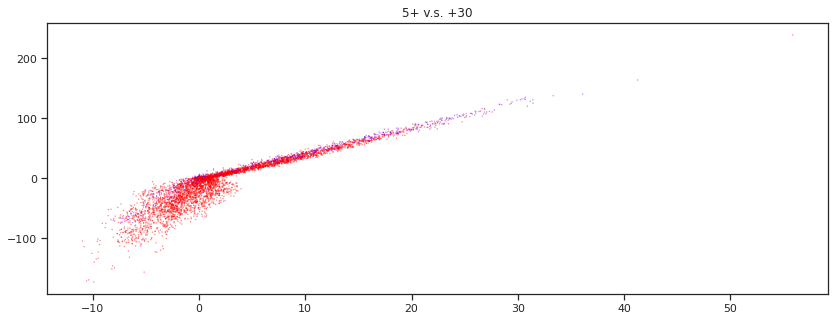

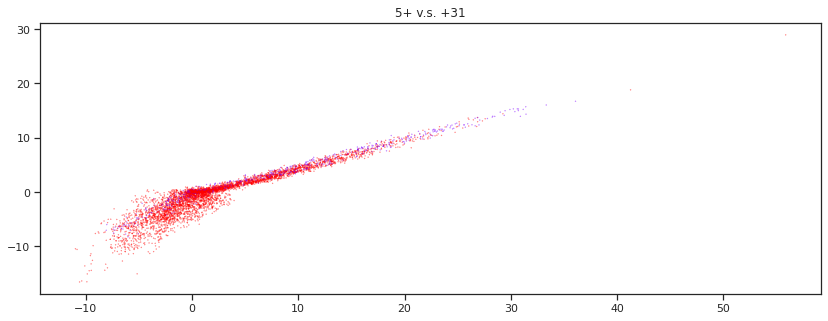

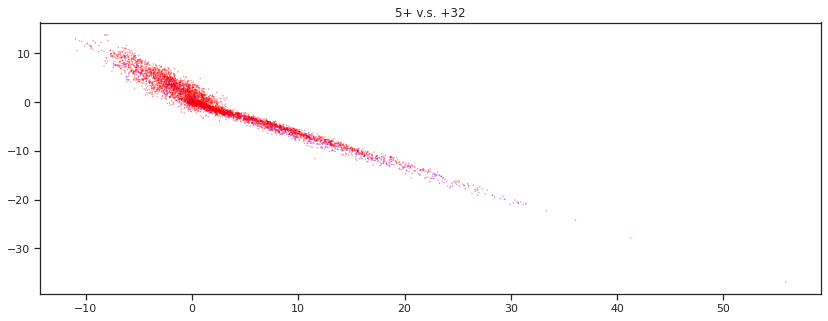

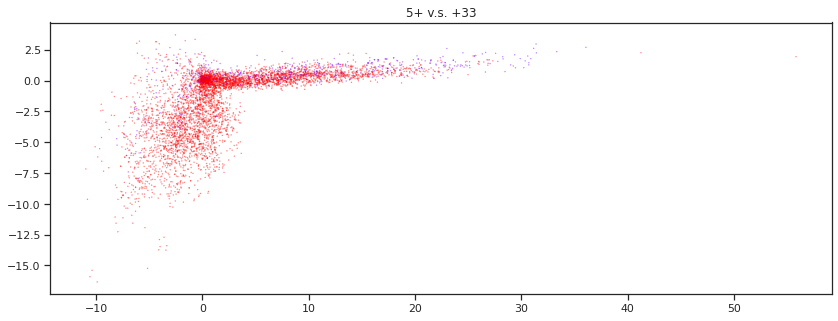

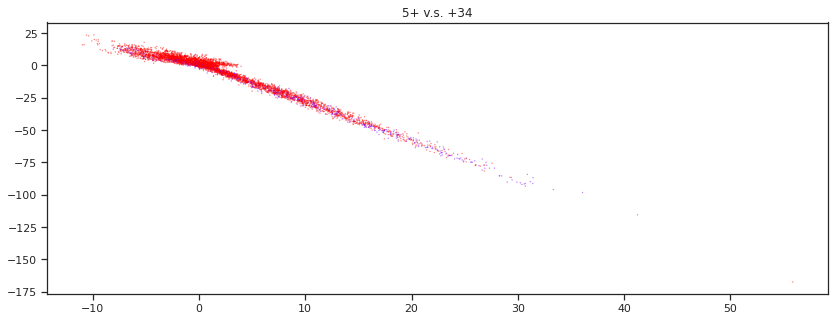





 17%|█▋        | 6/35 [01:31<07:17, 15.09s/it]

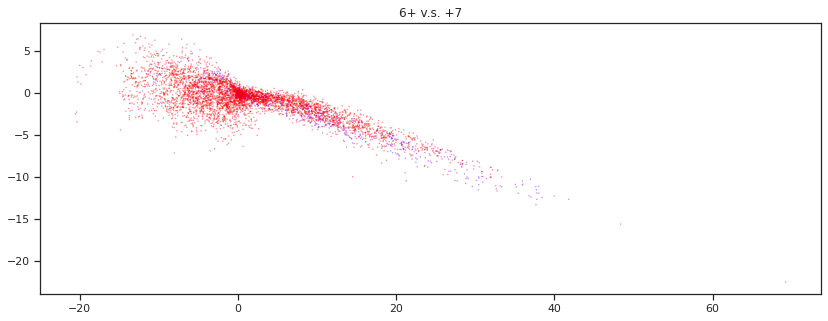

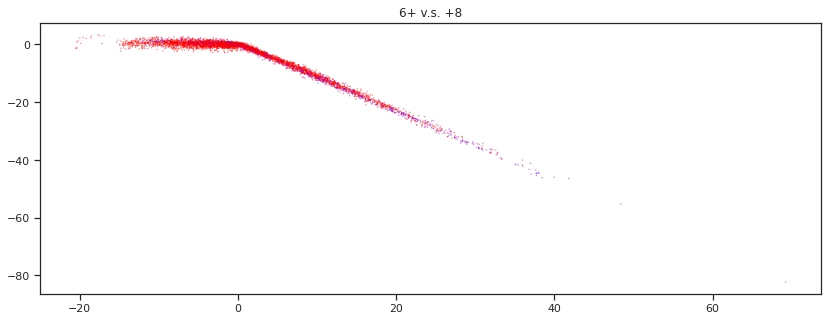

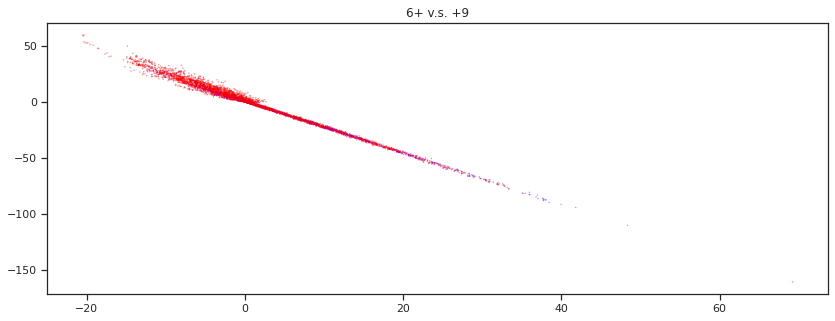

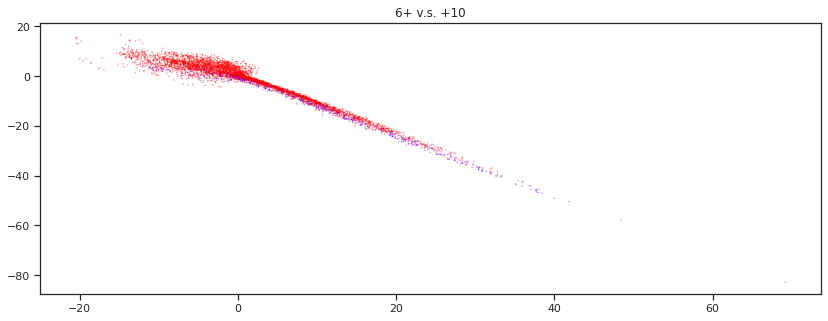

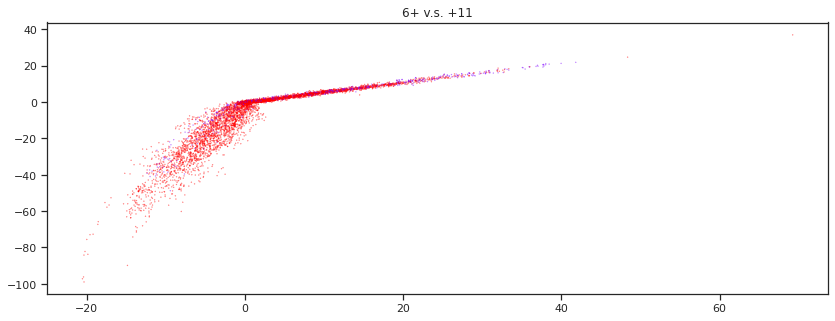

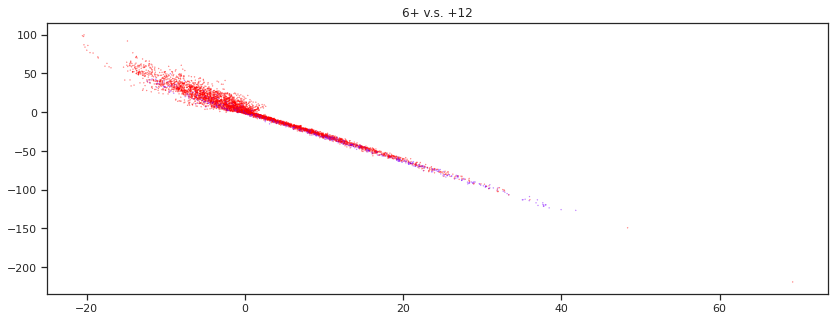

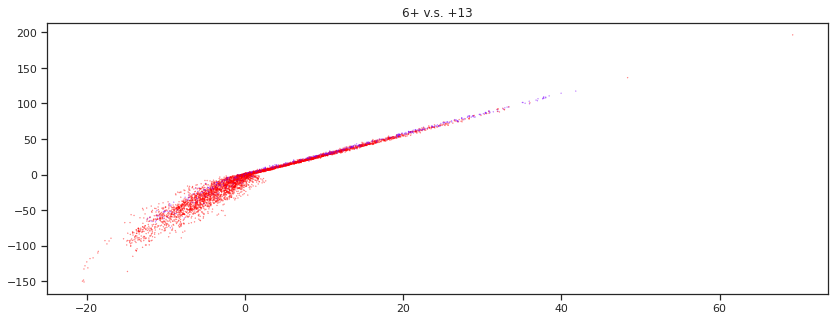

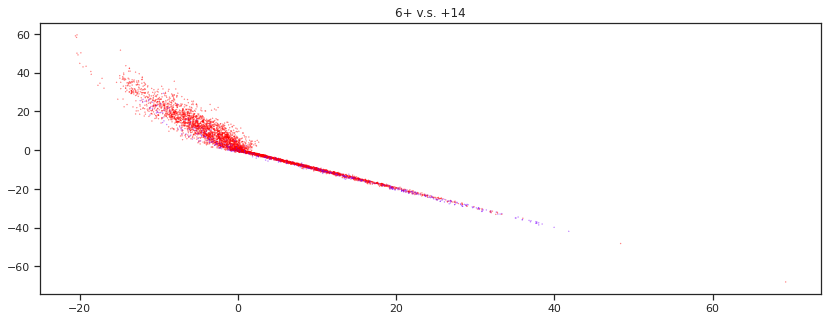

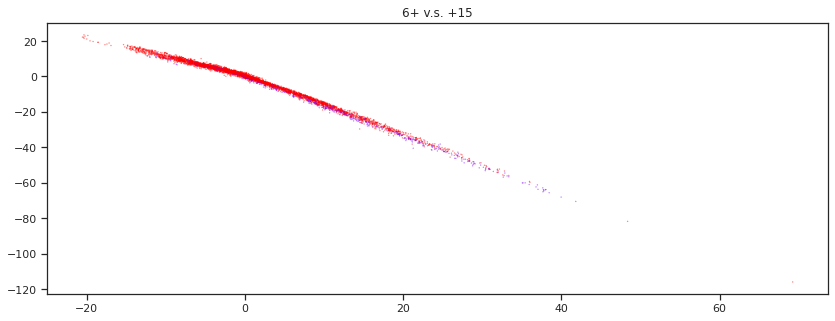

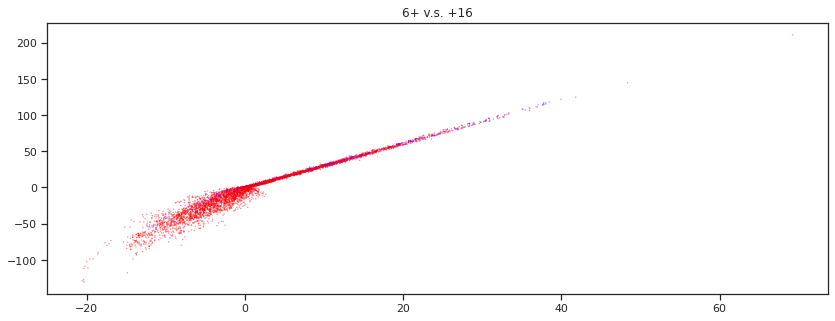

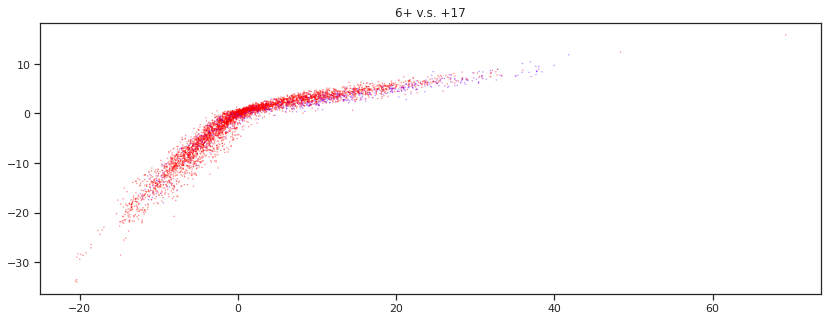

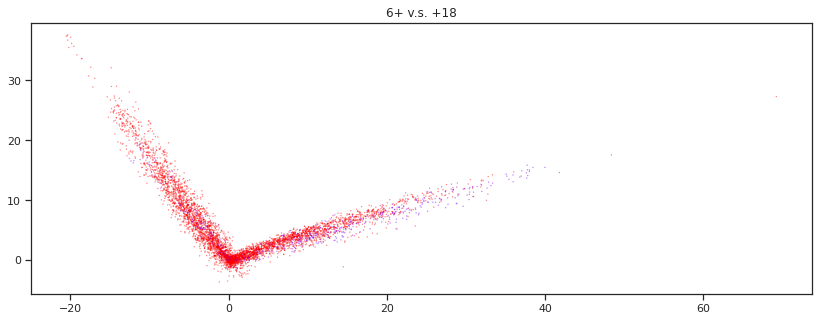

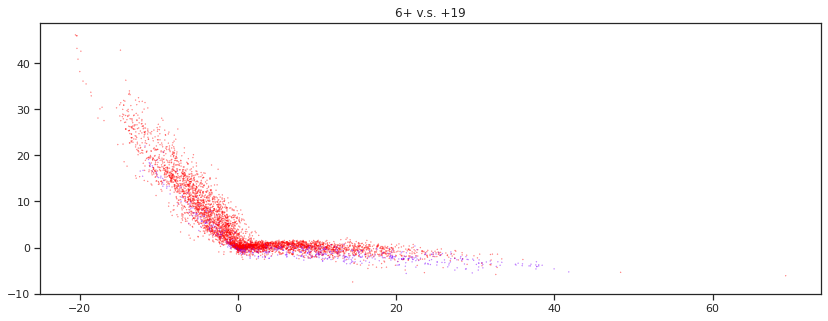

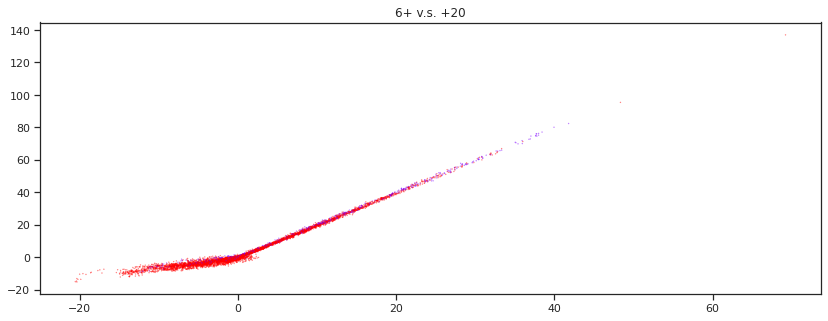

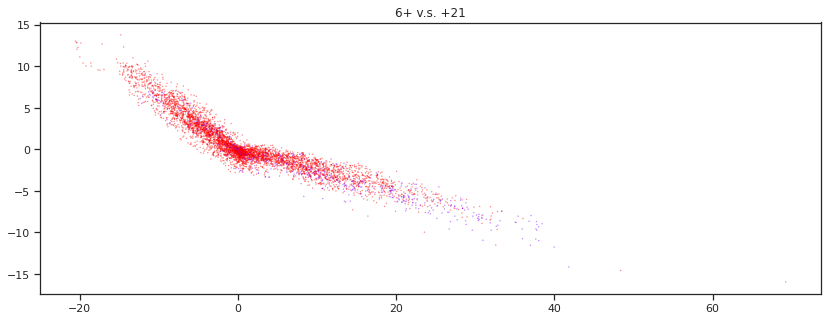

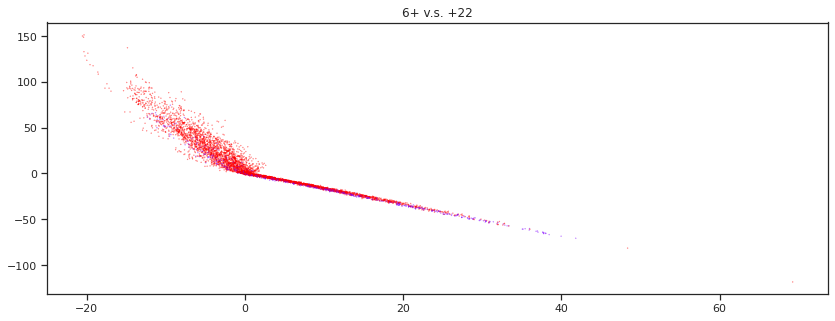

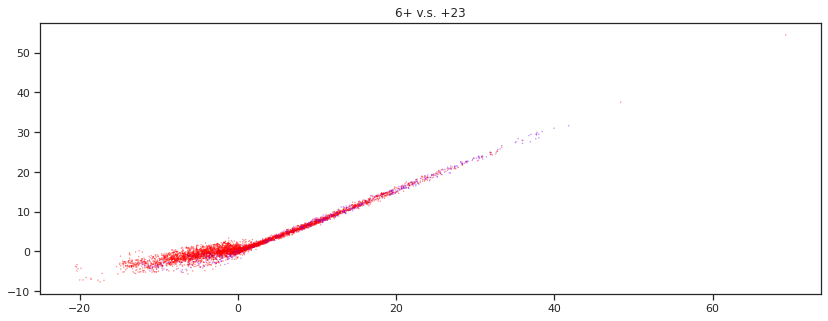

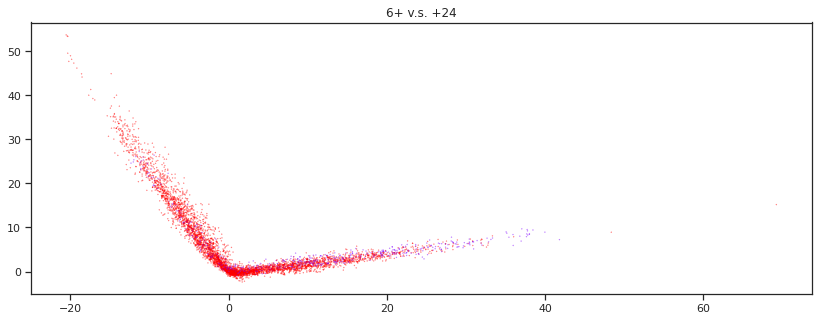

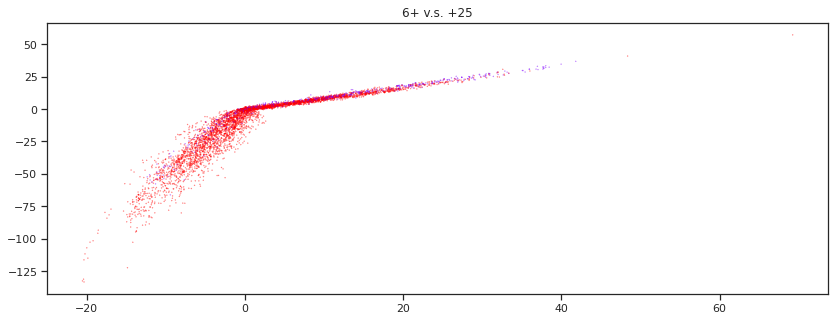

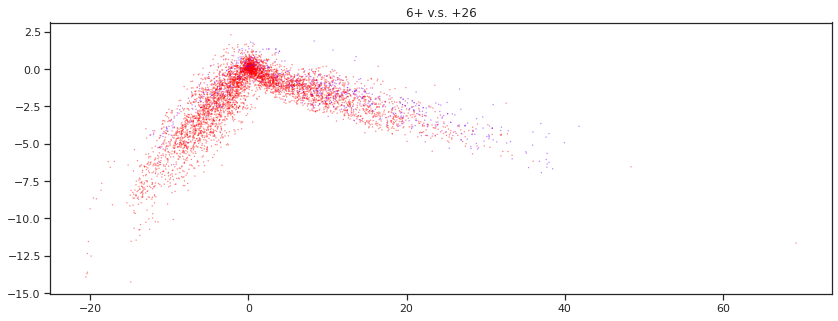

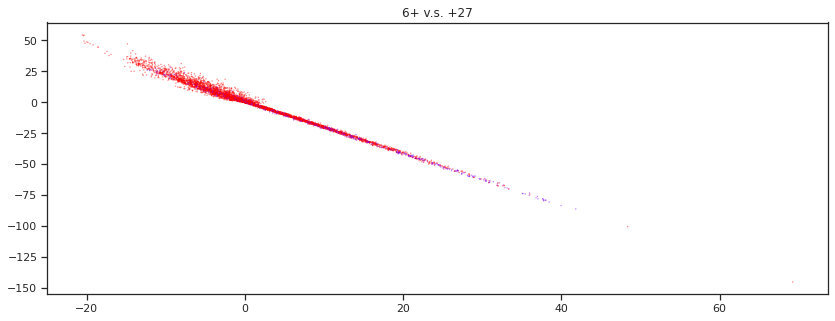

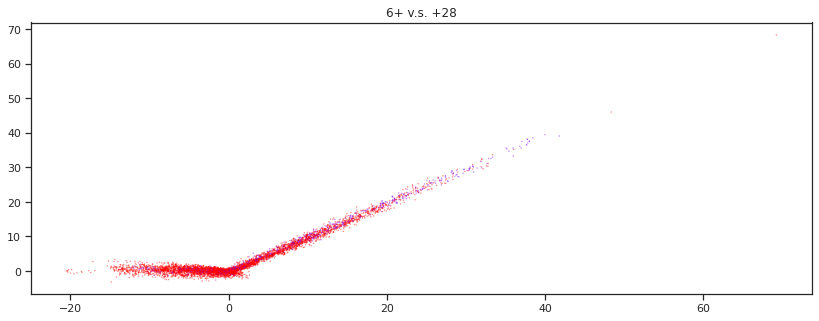

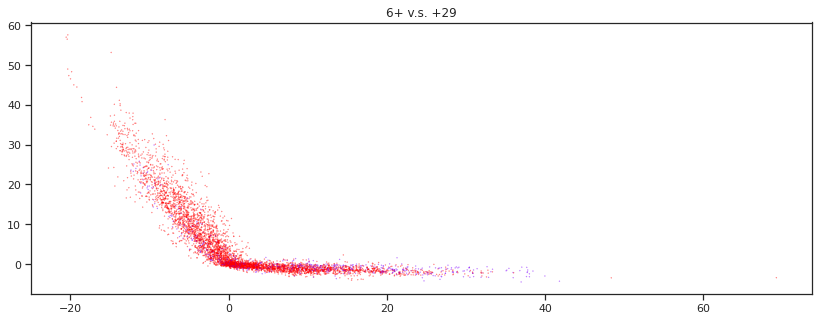

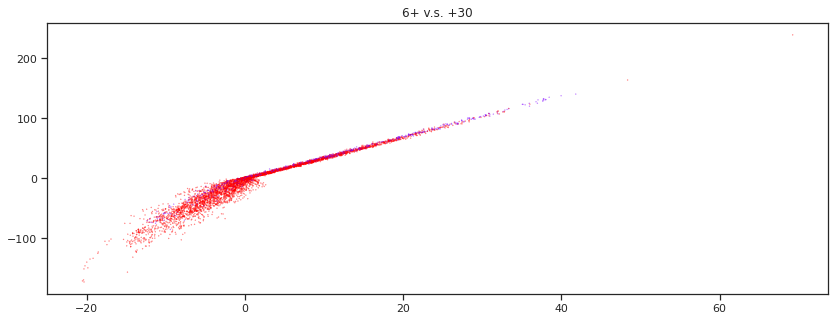

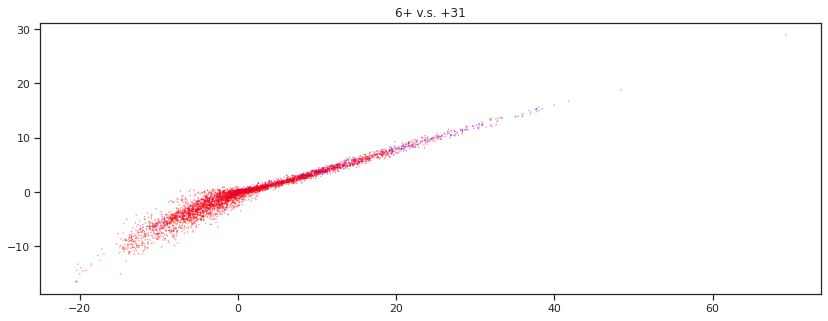

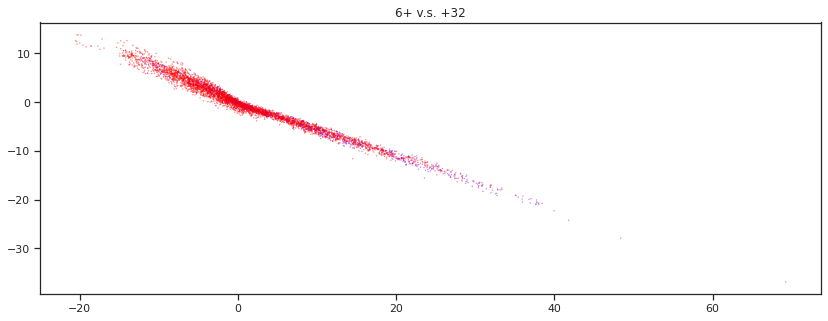

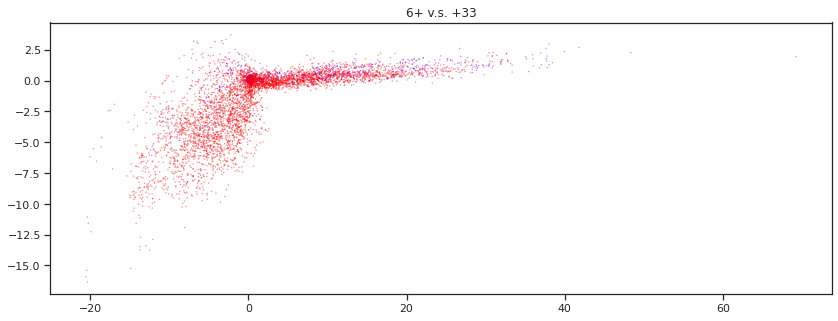

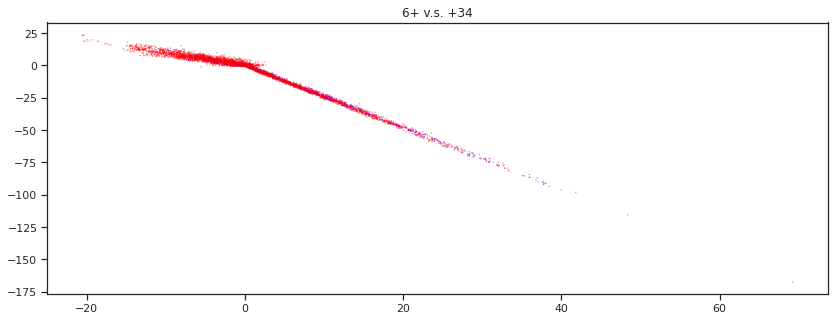





 20%|██        | 7/35 [01:45<06:52, 14.72s/it]

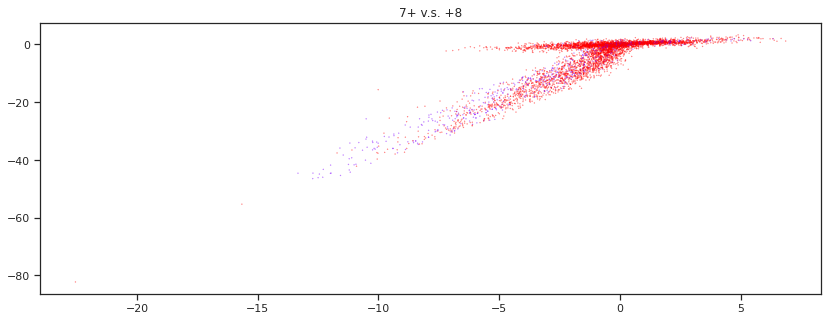

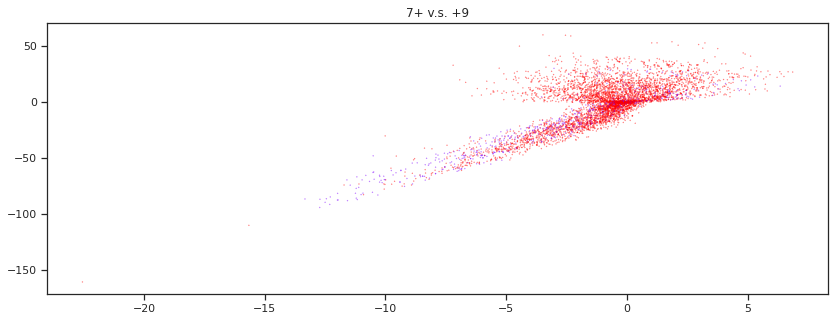

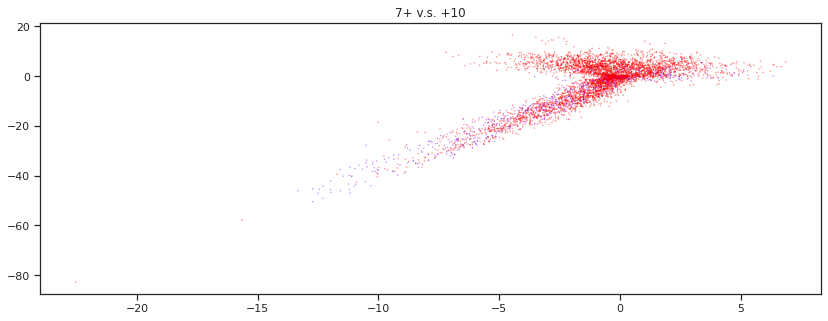

KeyboardInterrupt: ignored

<Figure size 1008x360 with 0 Axes>

In [66]:
 ### BEGIN Solution
import matplotlib.pyplot as plt
 from tqdm import tqdm
### Scale whole dataset
X_whole_scaleds = StandardScaler().fit_transform(clf_data) 

for i in tqdm(range(0,35)):
    for j in range(i+1, 35):
        plt.figure(figsize=(14, 5))
        net.eval()
        enc = net.encoder(torch.tensor(X_whole_scaleds, dtype=torch.float32, requires_grad=False)).detach().numpy()
        plt.scatter(enc[:,i], enc[:,j], c=clf_target, alpha=0.7, cmap = 'rainbow', s = 0.1);
        titl = str(i)+ "+ v.s. +"+ str(j)
        plt.title(titl)
        
        plt.savefig("scatter/"+titl+".jpeg")
        plt.show()
 ### END Solution


#         plt.title(cols[i] + " v.s. " + cols[j])
# #         plt.axis('equal')
#         plt.grid()
        
        # plt.close('all')

### Create GIF Out of Acquired Images

In [74]:
import cv2
import os                                             
import imageio
import numpy as np

image_folder = '../content/drive/MyDrive/scatter'
video_name = 'result.gif'

images = [img for img in os.listdir(image_folder) if img.endswith(".jpeg")]
#keys = [int(image[:-4]) for image in images]
#x = np.argsort(keys)
#images = np.array(images)#[x]

with imageio.get_writer(video_name, mode='I') as writer:
    for filename in images:
        image = imageio.imread(filename)
        writer.append_data(image)